In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import os

In [6]:
ROADS_1 = ['A. Maceda', 'Anda Circle', 'Antipolo',
         'Bluementritt', 'Buendia', 'Edsa Extension', 'Finance Road', 
         'Gov. Forbes - Lacson', 'Lerma', 'Magsaysay Ave', 'P.Noval', 'Pablo Ocampo', 'Pedro Gil', 
         'Quezon Ave.', 'Quirino', 'Rajah Sulayman', 'Taft Ave.', 'U.N. Avenue',
         'Vicente Cruz']

YEAR = "2015"
EXT = ".csv"

DATASET_DIR = "../../../../datasets/analysis/"
DATASET_DIVISION = "seasonWet"

In [7]:
def getAllHighCorr(dataset, limit):
    features = dataset.columns
    hc_features = []
    for w in range(1, len(features)):
#         print('Highly correlated with ' + str(w))
#         print(features[w])
        col_name = features[w]
        col = dataset[col_name]
        temp = col[((col <= -limit) | (col >= limit))]
        hc_features.append(temp)
#         print(str(temp))
        #print('\n')
        
        
    for w in range(0, len(features)-1):
        hc_features[w] = hc_features[w].to_frame()
        print(hc_features[w])
        print('\n')
        
    return hc_features

# Non-Rolling

In [8]:
CORR_NR = []
for r in range(len(ROADS_1)):
    df = pd.read_csv(DATASET_DIR + "/" + DATASET_DIVISION + "/" 
                     + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                     skipinitialspace=True)
    df = df.rename(columns={df.columns[0]:"Features"})
    CORR_NR.append(df)

In [9]:
r = 18
CORR_NR[r].index = CORR_NR[r].columns[1:]
minFeature = np.absolute(CORR_NR[r].iloc[1:, 1].round(4)).min()
print(minFeature)
print("Corr = Diff")
for i in CORR_NR[r].iloc[1:, 1].round(4):
    print(str(i) + " = " + str(round(np.absolute(i) - minFeature, 4)))
CORR_NR[r].iloc[:, 1:].round(3)

0.0259
Corr = Diff
0.1107 = 0.0848
-0.3575 = 0.3316
-0.1231 = 0.0972
-0.0606 = 0.0347
0.2999 = 0.274
0.0474 = 0.0215
-0.0472 = 0.0213
0.0259 = 0.0
-0.3603 = 0.3344
-0.2281 = 0.2022
-0.3577 = 0.3318
-0.0705 = 0.0446
-0.3603 = 0.3344


statusN  statusS  tempC  windspeedMiles  precipMM  humidity  \
statusN           1.000    0.111 -0.357          -0.123    -0.061     0.300   
statusS           0.111    1.000 -0.103           0.005     0.013     0.085   
tempC            -0.357   -0.103  1.000           0.059    -0.083    -0.914   
windspeedMiles   -0.123    0.005  0.059           1.000     0.424    -0.022   
precipMM         -0.061    0.013 -0.083           0.424     1.000     0.250   
humidity          0.300    0.085 -0.914          -0.022     0.250     1.000   
visibility        0.047   -0.024  0.080          -0.341    -0.776    -0.242   
pressure         -0.047    0.006  0.005          -0.483    -0.370    -0.109   
cloudcover        0.026   -0.016 -0.206           0.357     0.574     0.275   
heatIndexC       -0.360   -0.102  0.973           0.048    -0.019    -0.853   
dewPointC        -0.228   -0.061  0.345          -0.025     0.316    -0.057   
windChillC       -0.358   -0.103  1.000           0.060    -0.083    -0.914   
windGustMiles    -0.070    0.021 -0.085           0.961     0.507     0.122   
feelsLikeC       -0.360   -0.102  0.973           0.048    -0.019    -0.853   

                visibility  pressure  cloudcover  heatIndexC  dewPointC  \
statusN              0.047    -0.047       0.026      -0.360     -0.228   
statusS             -0.024     0.006      -0.016      -0.102     -0.061   
tempC                0.080     0.005      -0.206       0.973      0.345   
windspeedMiles      -0.341    -0.483       0.357       0.048     -0.025   
precipMM            -0.776    -0.370       0.574      -0.019      0.316   
humidity            -0.242    -0.109       0.275      -0.853     -0.057   
visibility           1.000     0.333      -0.459       0.019     -0.294   
pressure             0.333     1.000      -0.444      -0.046     -0.209   
cloudcover          -0.459    -0.444       1.000      -0.152      0.103   
heatIndexC           0.019    -0.046      -0.152       1.000      0.494   
dewPointC           -0.294    -0.209       0.103       0.494      1.000   
windChillC           0.079     0.004      -0.206       0.973      0.345   
windGustMiles       -0.417    -0.467       0.413      -0.097     -0.069   
feelsLikeC           0.019    -0.046      -0.152       1.000      0.494   

                windChillC  windGustMiles  feelsLikeC  
statusN             -0.358         -0.070      -0.360  
statusS             -0.103          0.021      -0.102  
tempC                1.000         -0.085       0.973  
windspeedMiles       0.060          0.961       0.048  
precipMM            -0.083          0.507      -0.019  
humidity            -0.914          0.122      -0.853  
visibility           0.079         -0.417       0.019  
pressure             0.004         -0.467      -0.046  
cloudcover          -0.206          0.413      -0.152  
heatIndexC           0.973         -0.097       1.000  
dewPointC            0.345         -0.069       0.494  
windChillC           1.000         -0.085       0.973  
windGustMiles       -0.085          1.000      -0.097  
feelsLikeC           0.973         -0.097       1.000

In [10]:
t = getAllHighCorr(CORR_NR[r], 0.1)

                 statusN
statusN         1.000000
statusS         0.110681
tempC          -0.357453
windspeedMiles -0.123109
humidity        0.299851
heatIndexC     -0.360284
dewPointC      -0.228120
windChillC     -0.357651
feelsLikeC     -0.360284


             statusS
statusN     0.110681
statusS     1.000000
tempC      -0.102754
heatIndexC -0.101890
windChillC -0.102763
feelsLikeC -0.101890


               tempC
statusN    -0.357453
statusS    -0.102754
tempC       1.000000
humidity   -0.914234
cloudcover -0.206256
heatIndexC  0.973317
dewPointC   0.344566
windChillC  0.999903
feelsLikeC  0.973317


                windspeedMiles
statusN              -0.123109
windspeedMiles        1.000000
precipMM              0.424447
visibility           -0.341171
pressure             -0.483427
cloudcover            0.356545
windGustMiles         0.961223


                precipMM
windspeedMiles  0.424447
precipMM        1.000000
humidity        0.250007
visibility     -0.775885
pressure    

In [11]:
CORR_NR[0].iloc[[1], 1:]

statusN  statusS     tempC  windspeedMiles  precipMM  humidity  \
1  0.260052      1.0 -0.163938       -0.077942 -0.062702  0.130592   

   visibility  pressure  cloudcover  heatIndexC  dewPointC  windChillC  \
1     0.07476  0.048893    0.020959   -0.136842  -0.029857   -0.163773   

   windGustMiles  feelsLikeC  
1      -0.077652   -0.136842

In [12]:
ROADS_SB_C = []
ROADS_NB_C = []

for r in range(len(ROADS_1)):
    #Analyzing Weather to Traffic 
    feature = 0 #NorthBound
    df = CORR_NR[r].iloc[[feature]]
    ROADS_NB_C.append(df)    
    
    feature = 1 #SouthBound
    df = CORR_NR[r].iloc[[feature]]
    ROADS_SB_C.append(df)

<br><br><br>
## NON-ROLLING - SOUTHBOUND

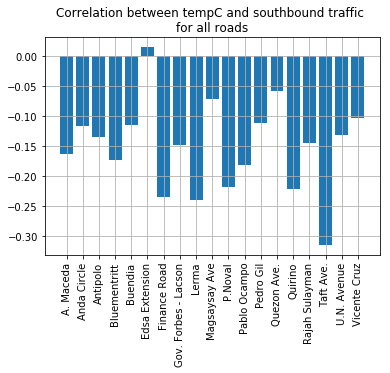

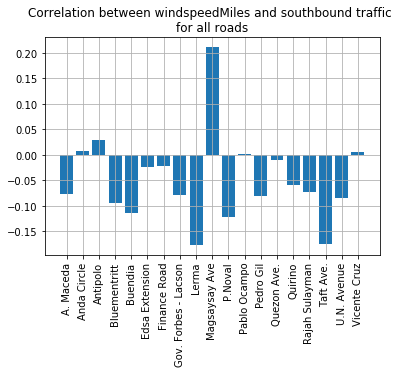

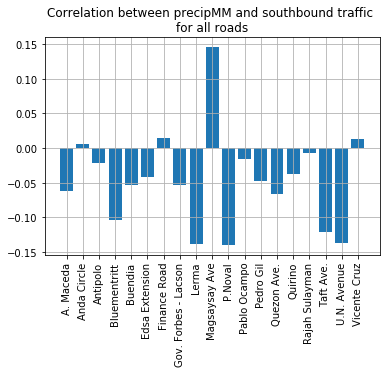

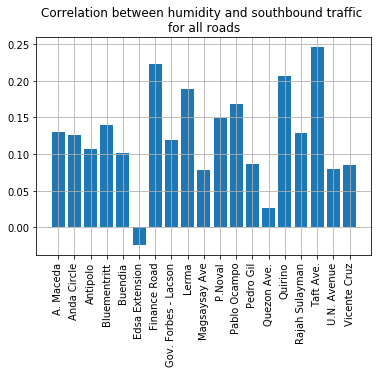

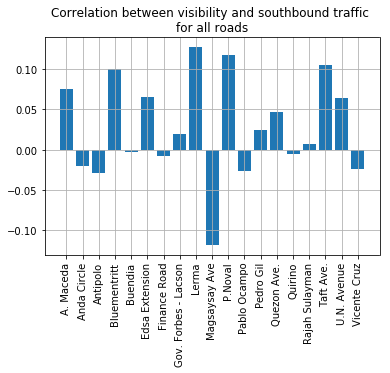

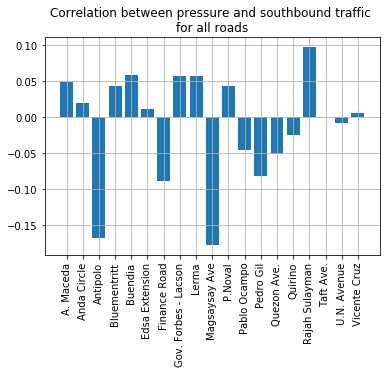

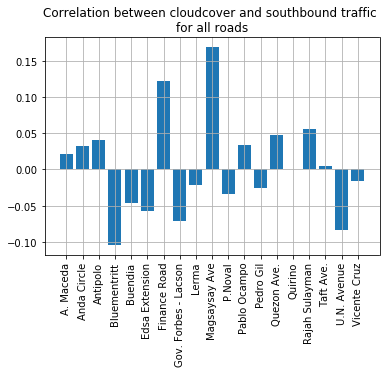

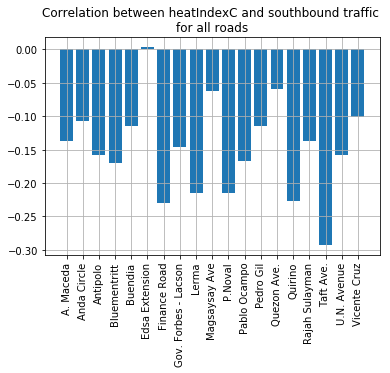

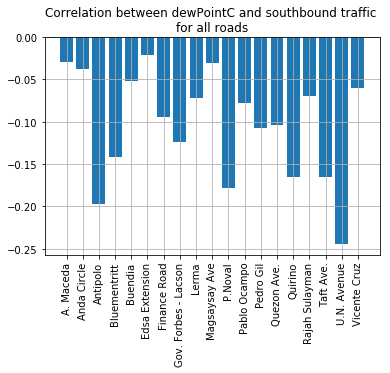

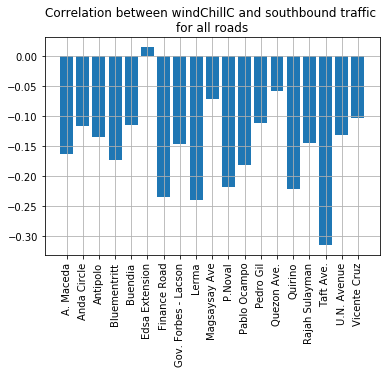

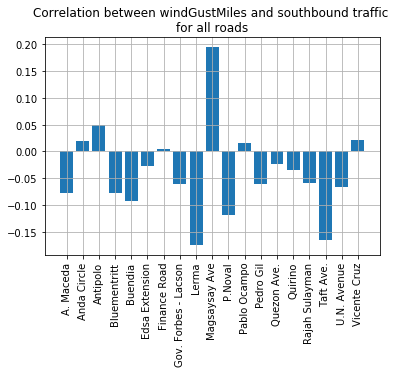

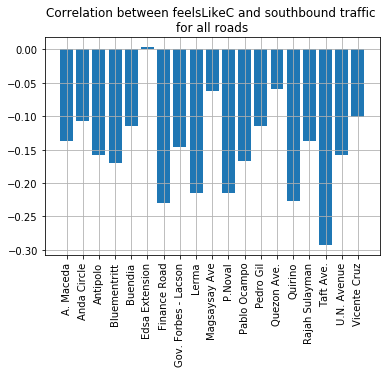

In [13]:
y = []
FEATURES = ROADS_SB_C[0].columns
for f in range(3, len(ROADS_SB_C[0].columns)): 
    y = []
    for r in ROADS_SB_C:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.title("Correlation between " + ROADS_SB_C[0].columns[f] + " and southbound traffic \nfor all roads")
    plt.xticks(rotation='vertical')
    plt.grid()
    plt.show()


:0


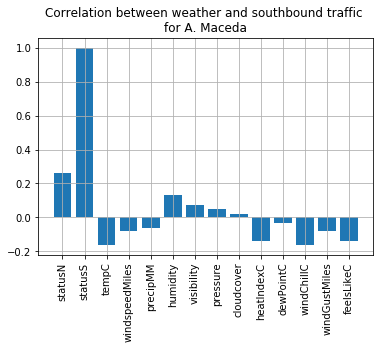

:1


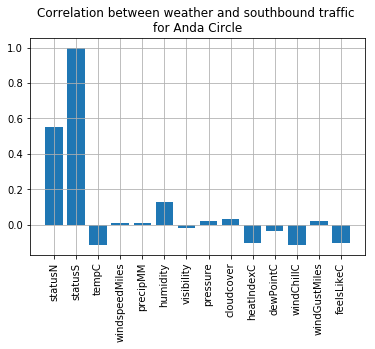

:2


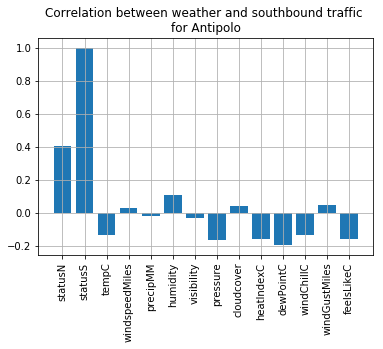

:3


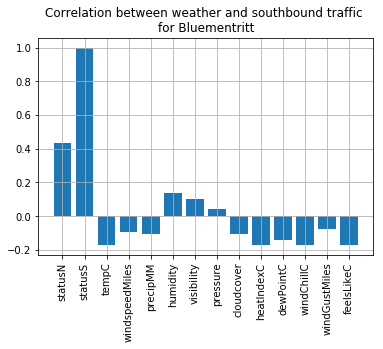

:4


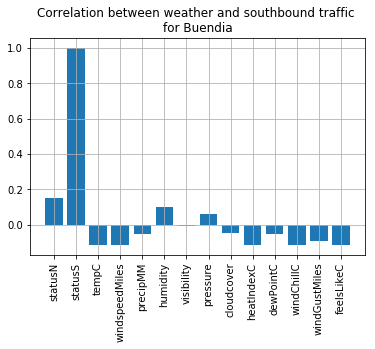

:5


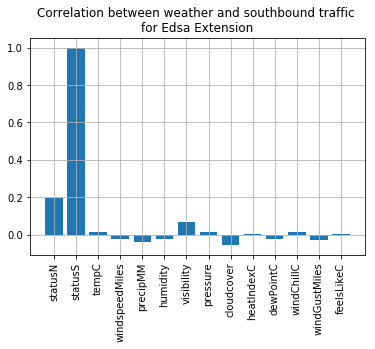

:6


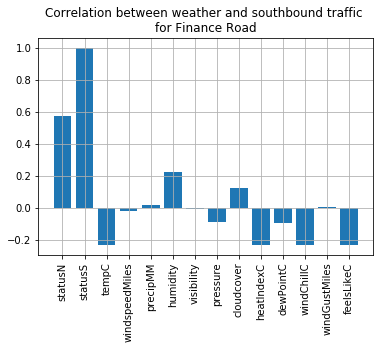

:7


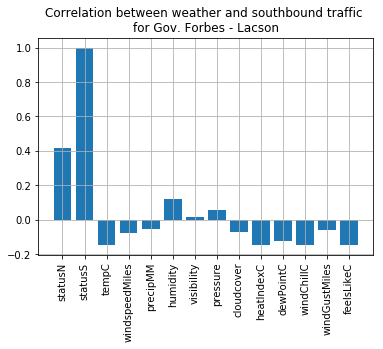

:8


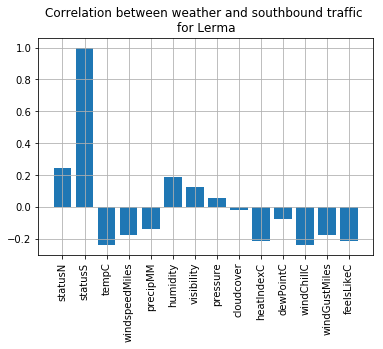

:9


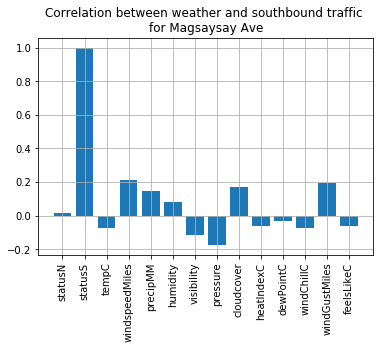

:10


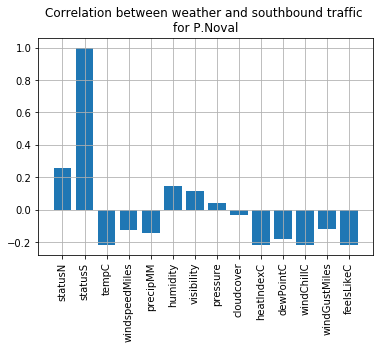

:11


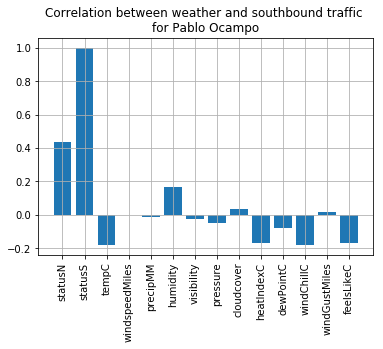

:12


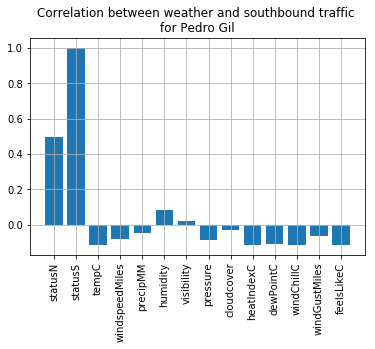

:13


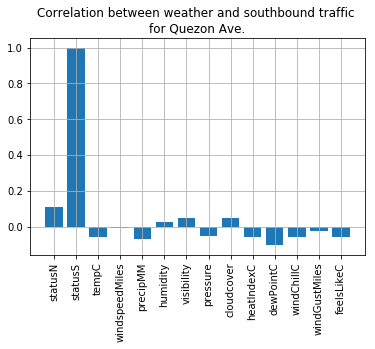

:14


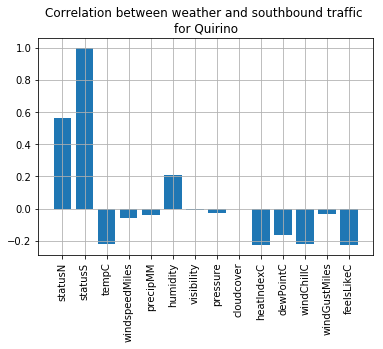

:15


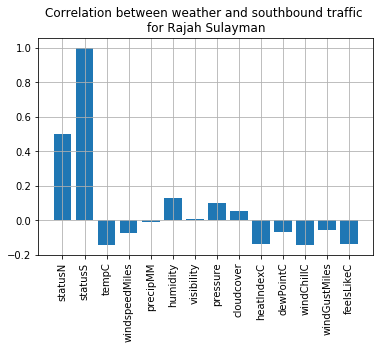

:16


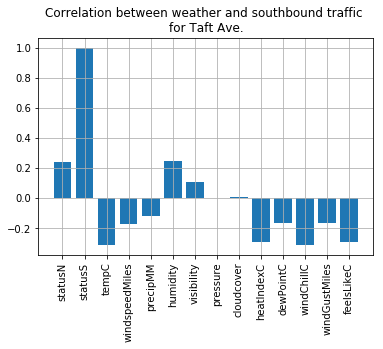

:17


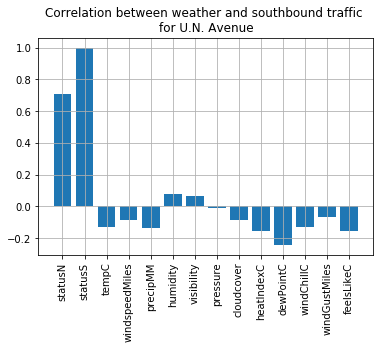

:18


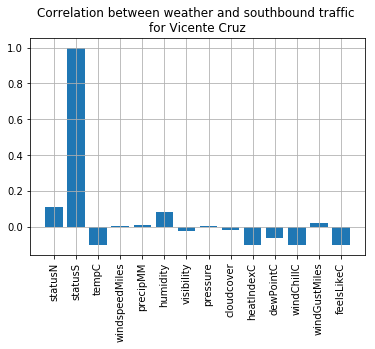

In [14]:
# for W=1
for r in range(len(ROADS_1)): 
    y = []
    for f in range(1, len(ROADS_SB_C[r].columns)):
        y.append(ROADS_SB_C[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.title("Correlation between weather and southbound traffic \nfor " + ROADS_1[r])
    print(":" + str(r))
    plt.grid()

    plt.show()

<br><br><br>
## NON-ROLLING - NORTHBOUND

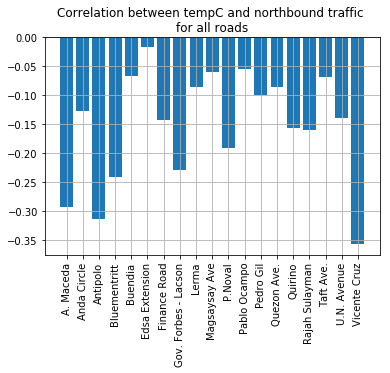

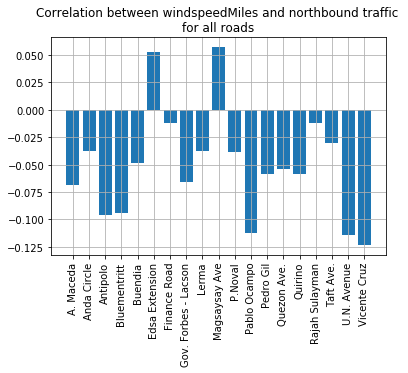

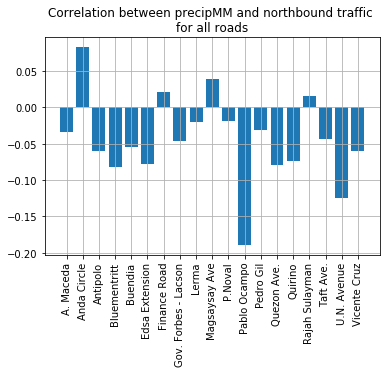

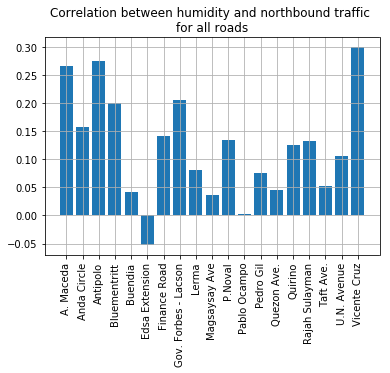

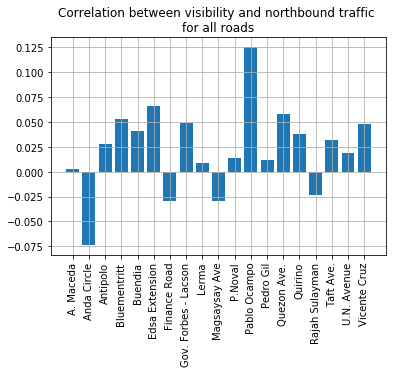

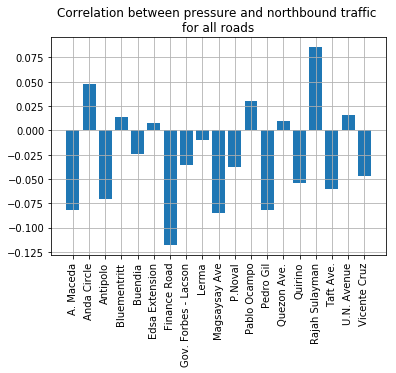

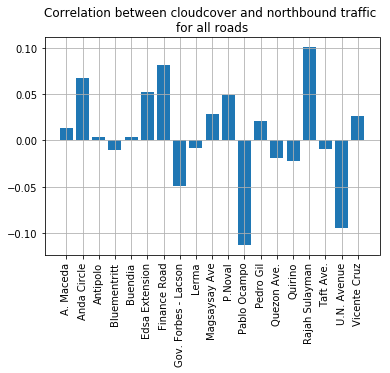

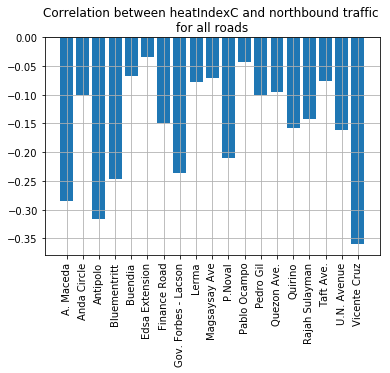

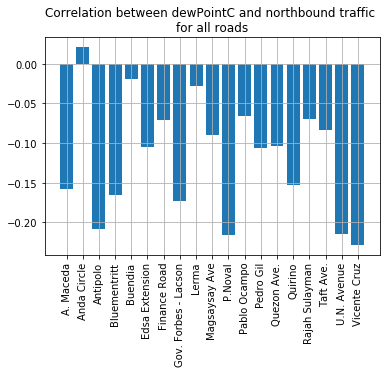

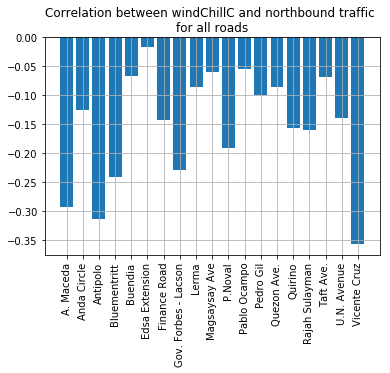

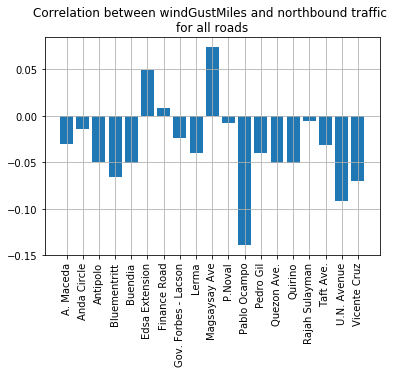

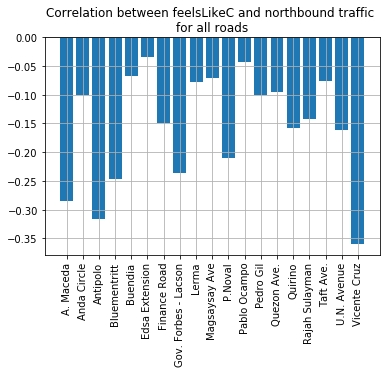

In [15]:
y = []
FEATURES = ROADS_NB_C[0].columns
for f in range(3, len(ROADS_NB_C[0].columns)): 
    y = []
    for r in ROADS_NB_C:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.title("Correlation between " + ROADS_NB_C[0].columns[f] + " and northbound traffic \nfor all roads")
    plt.xticks(rotation='vertical')
    plt.grid()
    plt.show()


:0


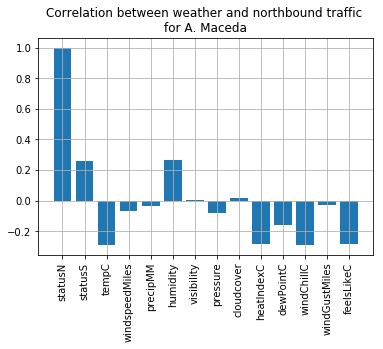

:1


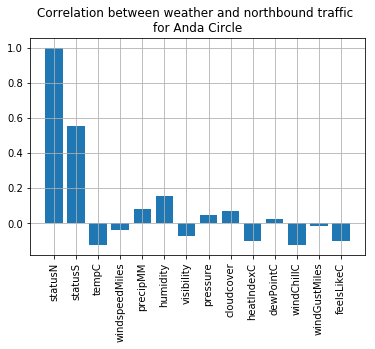

:2


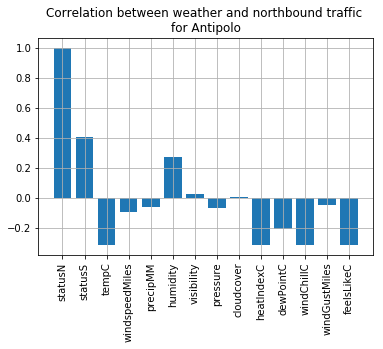

:3


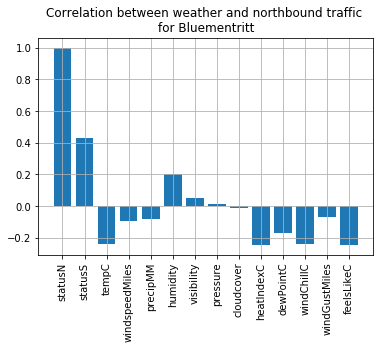

:4


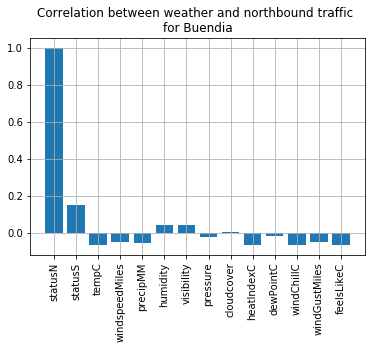

:5


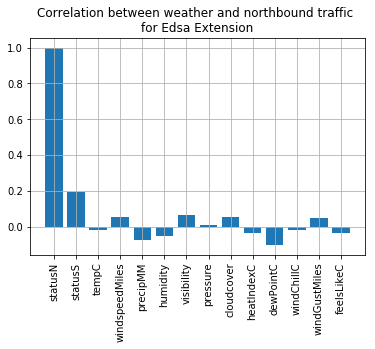

:6


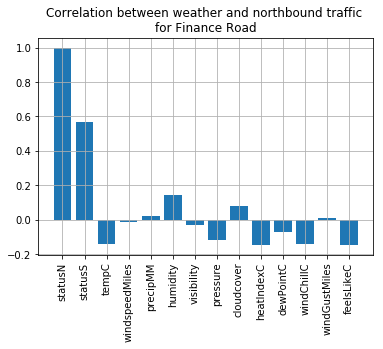

:7


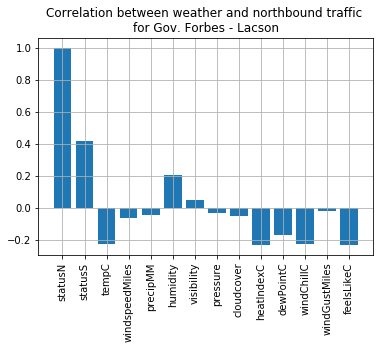

:8


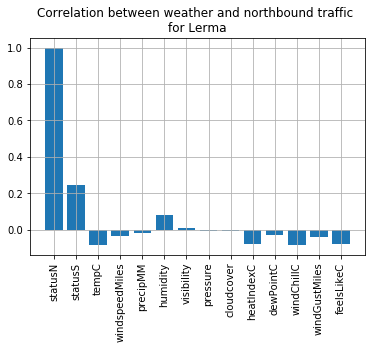

:9


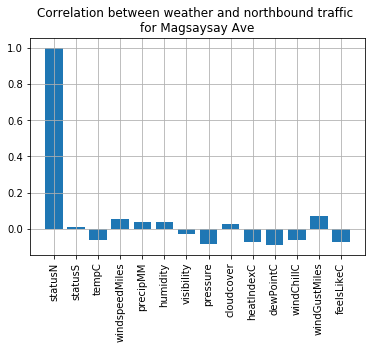

:10


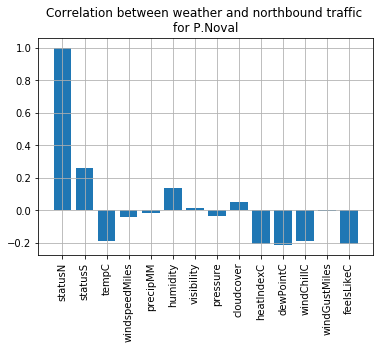

:11


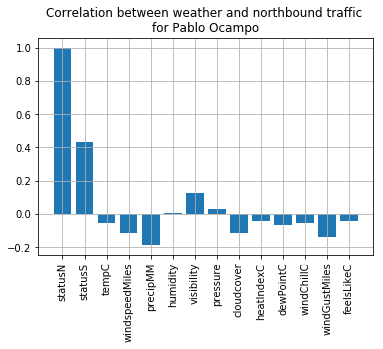

:12


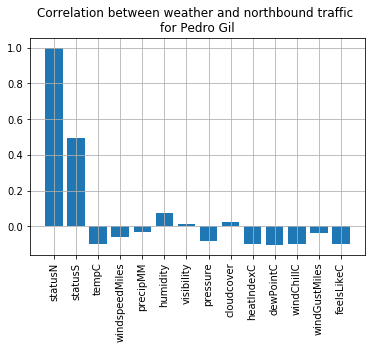

:13


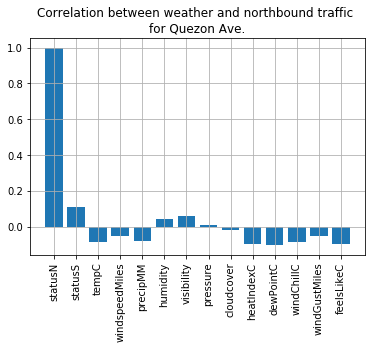

:14


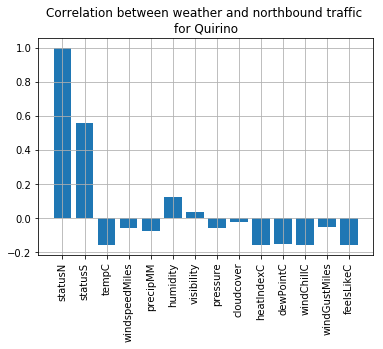

:15


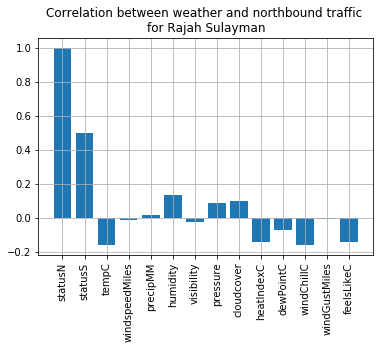

:16


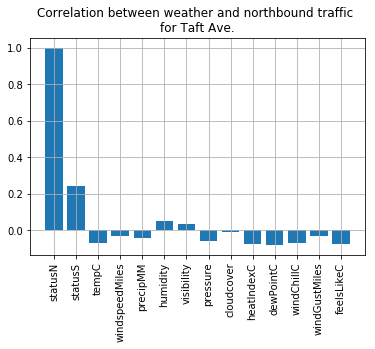

:17


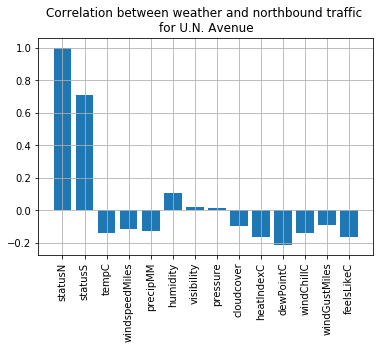

:18


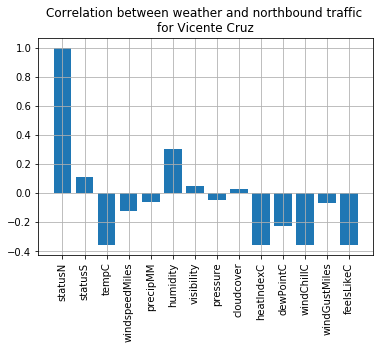

In [16]:
# for W=1
for r in range(len(ROADS_1)): 
    y = []
    for f in range(1, len(ROADS_NB_C[r].columns)):
        y.append(ROADS_NB_C[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.grid()
    plt.title("Correlation between weather and northbound traffic \nfor " + ROADS_1[r])
    print(":" + str(r))

    plt.show()

<br><br><br>
# Rolling

In [17]:
CORR_R = []
for r in range(len(ROADS_1)):
    df = pd.read_csv(DATASET_DIR + "rolling_" + DATASET_DIVISION + "/" 
                     "rolling-" + DATASET_DIVISION + "_" + ROADS_1[r] + "_" + YEAR + "_" + DATASET_DIVISION + EXT,
                     skipinitialspace=True)
    df = df.rename(columns={df.columns[0]:"Features"})
    CORR_R.append(df)

In [18]:
print(ROADS_1[18])
CORR_R[18].index = CORR_R[18].columns[1:]
CORR_R[18].iloc[:, 1:].iloc[56:, 56:]

Vicente Cruz


tempC  windspeedMiles  precipMM  humidity  \
tempC                   1.000000        0.046548 -0.057457 -0.911152   
windspeedMiles          0.046548        1.000000  0.358562 -0.006363   
precipMM               -0.057457        0.358562  1.000000  0.233812   
humidity               -0.911152       -0.006363  0.233812  1.000000   
visibility              0.009104       -0.267912 -0.727617 -0.139137   
pressure                0.015932       -0.466066 -0.432879 -0.107957   
cloudcover             -0.212381        0.353696  0.575022  0.272854   
heatIndexC              0.972702        0.039383  0.012509 -0.851037   
dewPointC               0.348241       -0.017523  0.355222 -0.058714   
windChillC              0.999881        0.047429 -0.056929 -0.910997   
windGustMiles          -0.084934        0.953458  0.450730  0.114771   
feelsLikeC              0.972702        0.039383  0.012509 -0.851037   
tempC_Rmean=2           0.992447        0.071382 -0.028864 -0.906694   
windspeedMiles_Rmean=2  0.020567        0.991953  0.374360  0.019242   
precipMM_Rmean=2       -0.110008        0.407394  0.936651  0.273780   
humidity_Rmean=2       -0.911253       -0.034077  0.208426  0.995821   
visibility_Rmean=2      0.171856       -0.308218 -0.655234 -0.314123   
pressure_Rmean=2        0.021833       -0.469746 -0.436302 -0.115332   
cloudcover_Rmean=2     -0.224108        0.358226  0.577162  0.283632   
heatIndexC_Rmean=2      0.972646        0.069037  0.044989 -0.847566   
dewPointC_Rmean=2       0.352308       -0.004304  0.368397 -0.059570   
windChillC_Rmean=2      0.992393        0.072226 -0.028373 -0.906520   
windGustMiles_Rmean=2  -0.129135        0.948695  0.443419  0.162925   
feelsLikeC_Rmean=2      0.972646        0.069037  0.044989 -0.847566   
tempC_Rmin=2            0.992266        0.080358 -0.023328 -0.900801   
windspeedMiles_Rmin=2   0.012392        0.992897  0.363063  0.026283   
precipMM_Rmin=2        -0.098023        0.367401  0.987113  0.272162   
humidity_Rmin=2        -0.913451       -0.030846  0.206840  0.996076   
visibility_Rmin=2       0.031891       -0.266553 -0.732459 -0.162838   
pressure_Rmin=2         0.020999       -0.470627 -0.437374 -0.114832   
...                          ...             ...       ...       ...   
cloudcover_Rmean=96    -0.260453        0.302303  0.361513  0.346555   
heatIndexC_Rmean=96     0.281533       -0.337614 -0.037733 -0.304267   
dewPointC_Rmean=96     -0.135621        0.074754  0.378536  0.277366   
windChillC_Rmean=96     0.308026       -0.335662 -0.106944 -0.362041   
windGustMiles_Rmean=96 -0.197695        0.408956  0.178945  0.224481   
feelsLikeC_Rmean=96     0.281533       -0.337614 -0.037733 -0.304267   
tempC_Rmin=96           0.190027       -0.030744  0.087903 -0.199416   
windspeedMiles_Rmin=96 -0.208295        0.396393  0.164592  0.246041   
precipMM_Rmin=96       -0.304314        0.258000  0.131173  0.379284   
humidity_Rmin=96       -0.340890        0.286186  0.260644  0.443144   
visibility_Rmin=96      0.095033       -0.191471 -0.351991 -0.165685   
pressure_Rmin=96        0.113773       -0.404676 -0.321554 -0.202325   
cloudcover_Rmin=96     -0.232335        0.282307  0.377485  0.333606   
heatIndexC_Rmin=96      0.159043       -0.018714  0.145342 -0.125689   
dewPointC_Rmin=96       0.021966       -0.003015  0.293536  0.098430   
windChillC_Rmin=96      0.190027       -0.030744  0.087903 -0.199416   
windGustMiles_Rmin=96  -0.198765        0.389750  0.178173  0.238229   
feelsLikeC_Rmin=96      0.159043       -0.018714  0.145342 -0.125689   
tempC_Rmax=96           0.331777       -0.347214 -0.131444 -0.384297   
windspeedMiles_Rmax=96 -0.158976        0.409416  0.164384  0.191067   
precipMM_Rmax=96       -0.145777        0.197926  0.472160  0.257278   
humidity_Rmax=96       -0.278946        0.146130  0.243583  0.397545   
visibility_Rmax=96      0.118407       -0.269676 -0.209445 -0.178715   
pressure_Rmax=96        0.104630       -0.387905 -0.323920 -0.18664

In [19]:
WINDOWS = [2,3,4,8,12,24,32,48,96]
FEATURES = CORR_NR[0].columns

In [20]:
ROADS_SB_CR = []
ROADS_NB_CR = []

for r in range(len(ROADS_1)):
    #Analyzing Weather to Traffic 
    feature = 0 #NorthBound
    df = CORR_R[r].iloc[[feature]]
    ROADS_NB_CR.append(df)    
    
    feature = 1 #SouthBound
    df = CORR_R[r].iloc[[feature]]  
    ROADS_SB_CR.append(df)    

<br>
## ROLLING - SOUTHBOUND

In [21]:
rMean = []
for w in WINDOWS:
    rMeanColumns = []
    window = w
    #Figuring out what columns are rolling mean
    for c in range(len(CORR_R[0].columns)):
        col = ROADS_SB_CR[0].columns[c]
        for f in FEATURES:
            if((f+"_Rmean=" + str(window)) == col):
                rMeanColumns.append(c)
    rMean.append(rMeanColumns)

In [22]:
ROADS_SB_CR[18]

Features   statusN  statusS  statusN_Rmean=2  statusS_Rmean=2  \
statusS  statusS  0.110681      1.0          0.11103         0.971326   

         statusN_Rmin=2  statusS_Rmin=2  statusN_Rmax=2  statusS_Rmax=2  \
statusS        0.112199        0.970315        0.108389        0.970796   

         statusN_Rmean=3         ...          precipMM_Rmax=96  \
statusS         0.108945         ...                 -0.037086   

         humidity_Rmax=96  visibility_Rmax=96  pressure_Rmax=96  \
statusS         -0.009599            0.009533         -0.004631   

         cloudcover_Rmax=96  heatIndexC_Rmax=96  dewPointC_Rmax=96  \
statusS            0.015751            0.016289          -0.051836   

         windChillC_Rmax=96  windGustMiles_Rmax=96  feelsLikeC_Rmax=96  
statusS            0.020493              -0.034034            0.016289  

[1 rows x 393 columns]

#### One Graph = All Features of Window w of Road r

:0


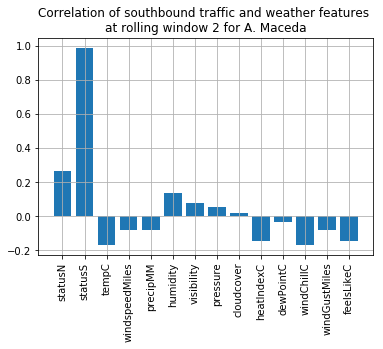

:1


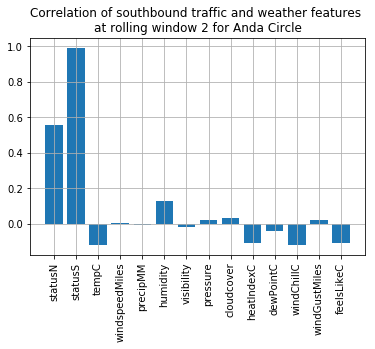

:2


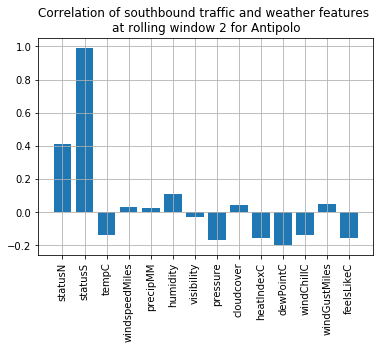

:3


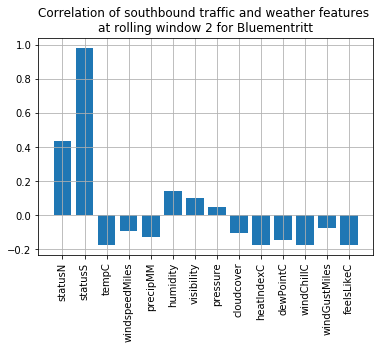

:4


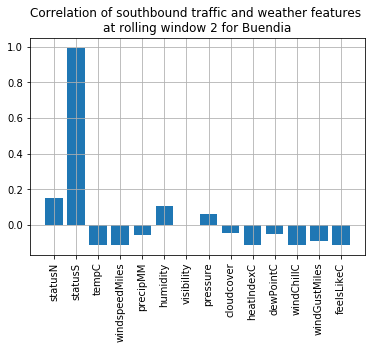

:5


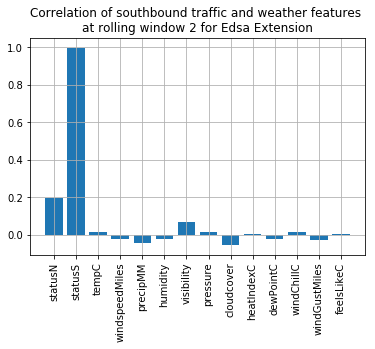

:6


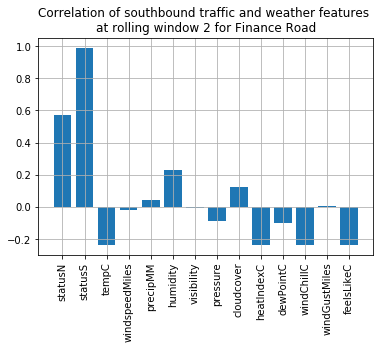

:7


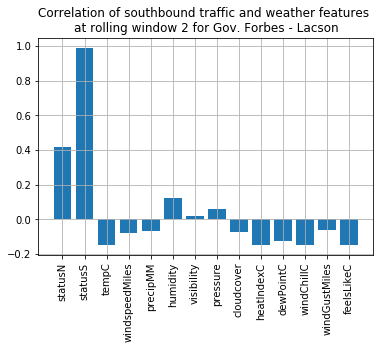

:8


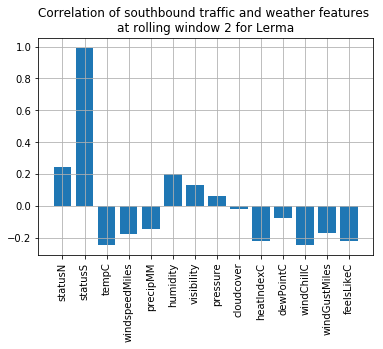

:9


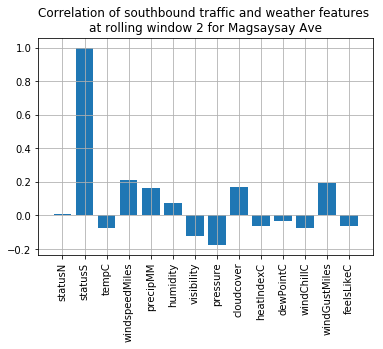

:10


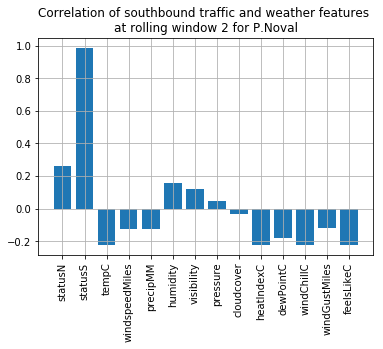

:11


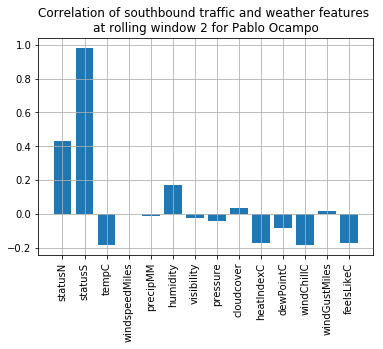

:12


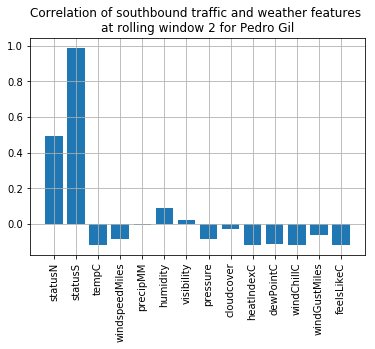

:13


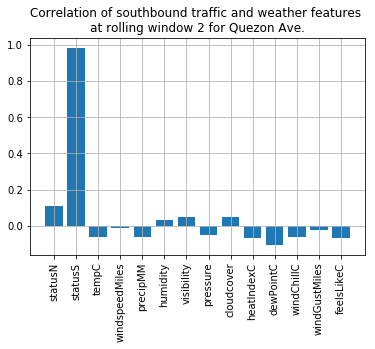

:14


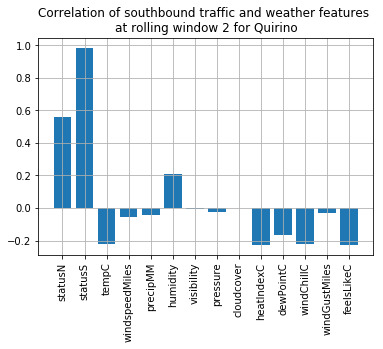

:15


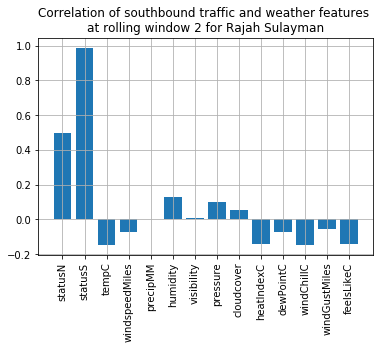

:16


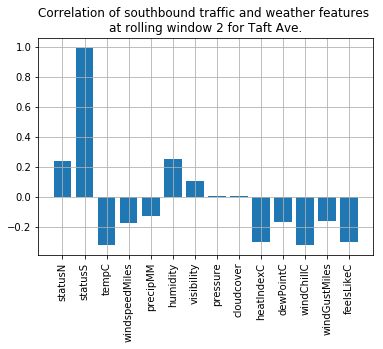

:17


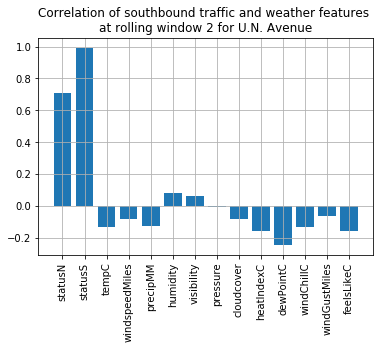

:18


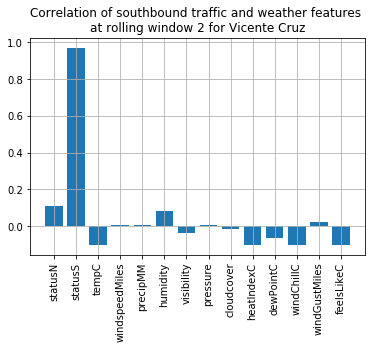

In [23]:
# for W=1
w = 0

for r in range(len(ROADS_1)): 
    y = []
    for f in range(3, len(ROADS_SB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_SB_CR[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    print(":" + str(r))
    plt.grid()
    plt.title("Correlation of southbound traffic and weather features \nat rolling window " + str(WINDOWS[w]) + " for " + ROADS_1[r])

    plt.show()

#### All Graph = Road r.  One Graph = Window of All Features

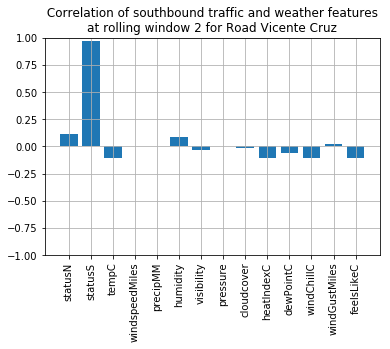

statusN : 0.1110296477705687
statusS : 0.9713256083297622
tempC : -0.10243854352155828
windspeedMiles : 0.0065111135339476845
precipMM : 0.005832211576854265
humidity : 0.08574183712512998
visibility : -0.035068116065127344
pressure : 0.006623532626098177
cloudcover : -0.016057758359656303
heatIndexC : -0.10339002243491237
dewPointC : -0.06184546298652814
windChillC : -0.10235187241051333
windGustMiles : 0.02161588740415293
feelsLikeC : -0.10339002243491237
Max for WINDOW 2 : 0.10339002243491237 for Feature: heatIndexC



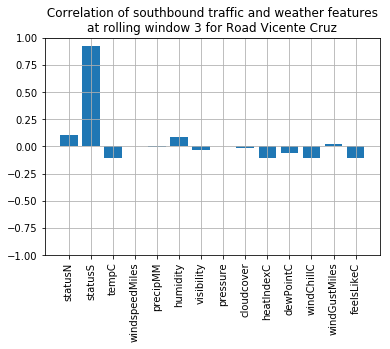

statusN : 0.1089446188336965
statusS : 0.924706815802802
tempC : -0.10485540578080316
windspeedMiles : 0.008757928936114764
precipMM : -0.00782621519500718
humidity : 0.08626476607313831
visibility : -0.03460715028595434
pressure : 0.004209425117387658
cloudcover : -0.016597874493816295
heatIndexC : -0.1052568549186022
dewPointC : -0.06271337528466844
windChillC : -0.10469265262634576
windGustMiles : 0.0214866671433114
feelsLikeC : -0.1052568549186022
Max for WINDOW 3 : 0.1052568549186022 for Feature: heatIndexC



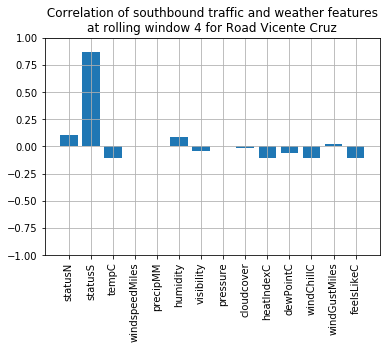

statusN : 0.1064811521823284
statusS : 0.870895882330942
tempC : -0.10452701344565173
windspeedMiles : 0.0030991657590312915
precipMM : 0.008673378404100568
humidity : 0.0861281299667927
visibility : -0.037572469725002826
pressure : 0.008662181085227995
cloudcover : -0.0168597572707308
heatIndexC : -0.10518304887176043
dewPointC : -0.0606158071182579
windChillC : -0.10435752327536883
windGustMiles : 0.01893062029720041
feelsLikeC : -0.10518304887176043
Max for WINDOW 4 : 0.10518304887176043 for Feature: heatIndexC



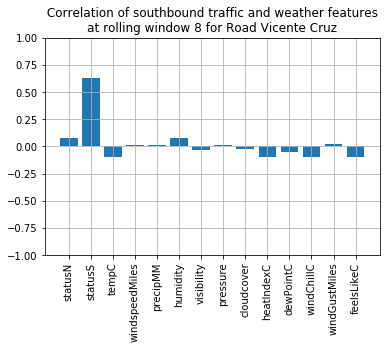

statusN : 0.08032214622690258
statusS : 0.6266612361155501
tempC : -0.09599680420882904
windspeedMiles : 0.01106178595881442
precipMM : 0.010686808880752224
humidity : 0.08079248107280637
visibility : -0.033068668456411016
pressure : 0.010721321651997314
cloudcover : -0.01959567864433416
heatIndexC : -0.09879409195237124
dewPointC : -0.04762649022939648
windChillC : -0.09574050179127323
windGustMiles : 0.02469471437858507
feelsLikeC : -0.09879409195237124
Max for WINDOW 8 : 0.09879409195237124 for Feature: heatIndexC



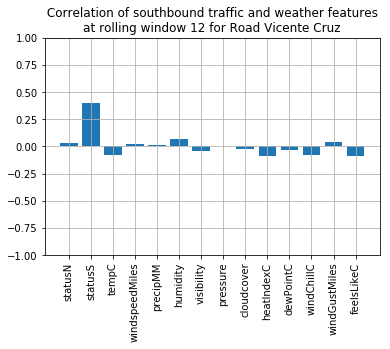

statusN : 0.034016706660173535
statusS : 0.396797531073536
tempC : -0.0803792375326106
windspeedMiles : 0.02308252025649713
precipMM : 0.017800040001895858
humidity : 0.07152523866660032
visibility : -0.037592148942683805
pressure : 0.006738581882551704
cloudcover : -0.019240073684962816
heatIndexC : -0.08708297031805018
dewPointC : -0.03424094329996663
windChillC : -0.08037999228708888
windGustMiles : 0.03653024962193028
feelsLikeC : -0.08708297031805018
Max for WINDOW 12 : 0.08708297031805018 for Feature: heatIndexC



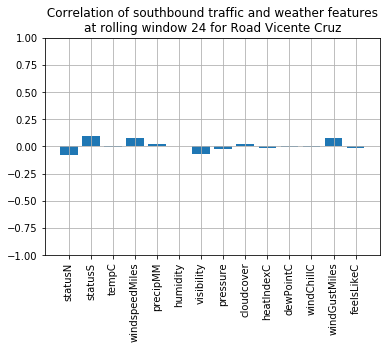

statusN : -0.07470894361631157
statusS : 0.0928427508859986
tempC : -0.008045368851122784
windspeedMiles : 0.07737073607985692
precipMM : 0.026890836661294208
humidity : 0.007510581788810419
visibility : -0.06550919147169662
pressure : -0.019080522284401418
cloudcover : 0.02327311643424556
heatIndexC : -0.01644386883131869
dewPointC : -0.0009097638136183065
windChillC : -0.008016945442424591
windGustMiles : 0.07467877984329896
feelsLikeC : -0.01644386883131869
Max for WINDOW 24 : 0.07737073607985692 for Feature: windspeedMiles



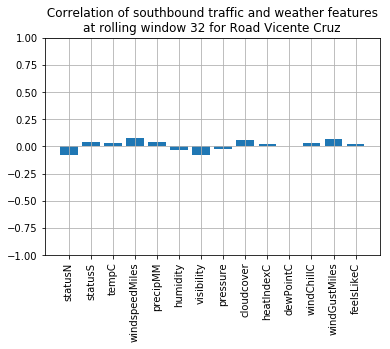

statusN : -0.08035003509522393
statusS : 0.0450563068969991
tempC : 0.028990987523746525
windspeedMiles : 0.07451983856911265
precipMM : 0.044340819677883635
humidity : -0.03339950613576166
visibility : -0.07731878670215724
pressure : -0.02714653229701956
cloudcover : 0.06252738607709794
heatIndexC : 0.024815426680793642
dewPointC : 0.0021572947280814173
windChillC : 0.028871707977526976
windGustMiles : 0.06708058170609793
feelsLikeC : 0.024815426680793642
Max for WINDOW 32 : 0.07731878670215724 for Feature: visibility



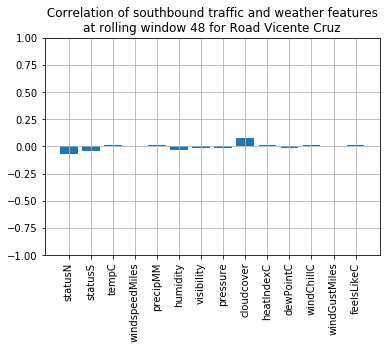

statusN : -0.06554083536315361
statusS : -0.03889631709368699
tempC : 0.015000353983830062
windspeedMiles : 0.003107681683080812
precipMM : 0.017457426382819836
humidity : -0.036649436342887615
visibility : -0.012299003119128163
pressure : -0.012750134285777795
cloudcover : 0.07526408586831568
heatIndexC : 0.01672602937377567
dewPointC : -0.017981412321572354
windChillC : 0.014814904480174262
windGustMiles : 1.4373818567122021e-05
feelsLikeC : 0.01672602937377567
Max for WINDOW 48 : 0.07526408586831568 for Feature: cloudcover



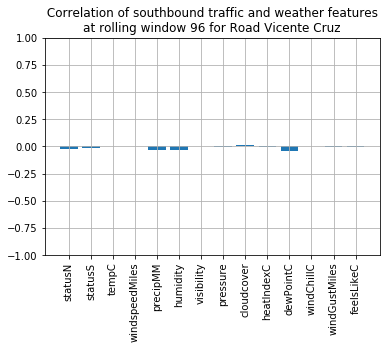

statusN : -0.02281257922346893
statusS : -0.016179022667742002
tempC : 0.003034459087458367
windspeedMiles : 0.005687724992832899
precipMM : -0.029212019984791237
humidity : -0.030126642325922957
visibility : 0.003494847333929934
pressure : -0.003964730369028154
cloudcover : 0.013915525353032606
heatIndexC : -0.005637187759802494
dewPointC : -0.04191864683570588
windChillC : 0.003923144957589772
windGustMiles : -0.0021042031475889075
feelsLikeC : -0.005637187759802494
Max for WINDOW 96 : 0.04191864683570588 for Feature: dewPointC
Max: 0.1052568549186022
Found in Window: 3


In [24]:
r = 18

maxes = []

fig, ax = plt.subplots()
yGroup = []
fin = False
for w in range(len(WINDOWS)): 
    y = []
    for f in range(3, len(ROADS_SB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_SB_CR[r].iloc[0, f])
    print()
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.ylim(ymin=-1, ymax=1)
    plt.title(" Correlation of southbound traffic and weather features \nat rolling window " + str(WINDOWS[w]) + " for Road " + ROADS_1[r])    
    plt.grid()
    plt.show()
    
    for i in range(len(y)):
        print(FEATURES[i+1] + " : " + str(y[i]))
    print("Max for WINDOW " + str(WINDOWS[w]) + " : " + str(np.absolute(y[2:]).max()) + " for Feature: " + FEATURES[np.argmax(np.absolute(y[2:]))+3])
    maxes.append(np.absolute(y[2:]).max())
    
print("===============")
print("Max: " + str(np.amax(maxes)))
print("Found in Window: " + str(WINDOWS[np.argmax(maxes)]))

#### One Graph = One Feature of All Roads for Window w

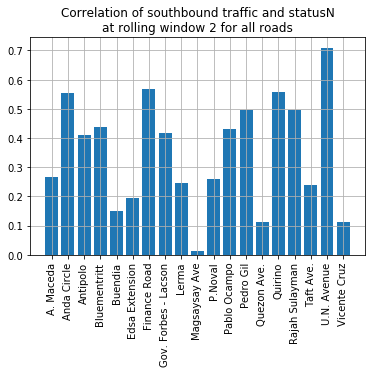

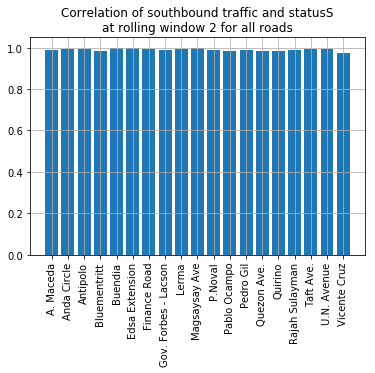

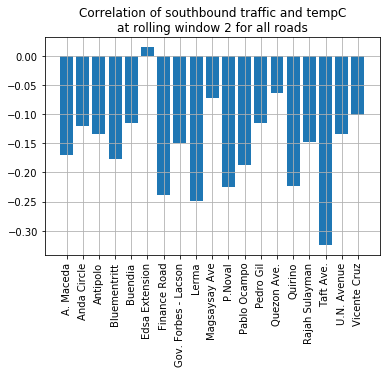

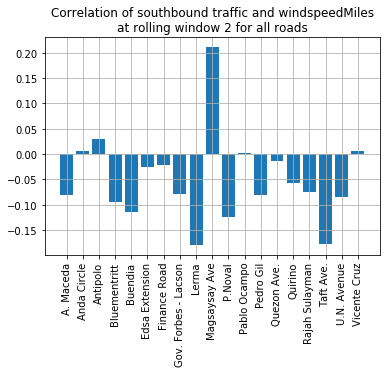

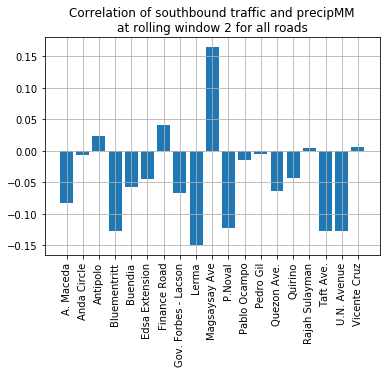

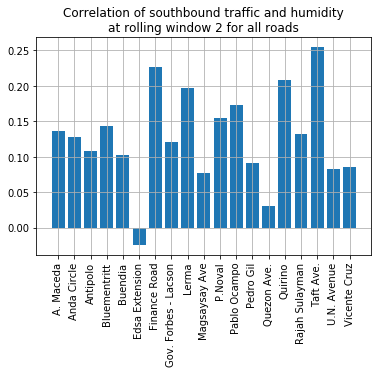

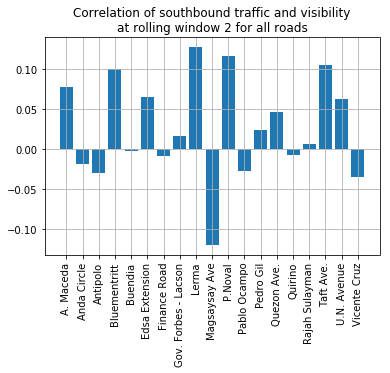

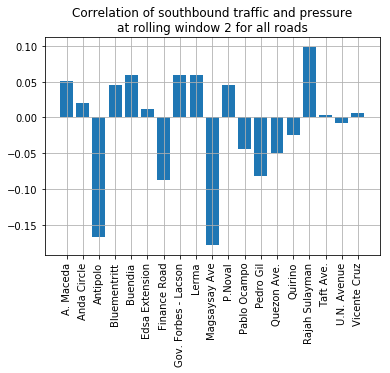

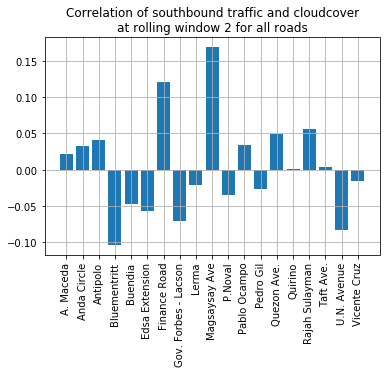

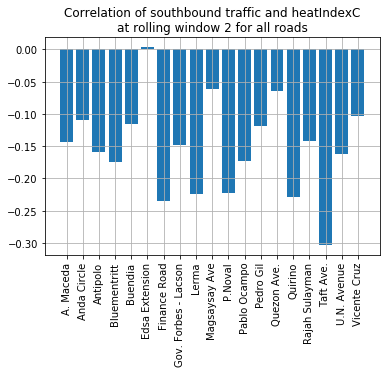

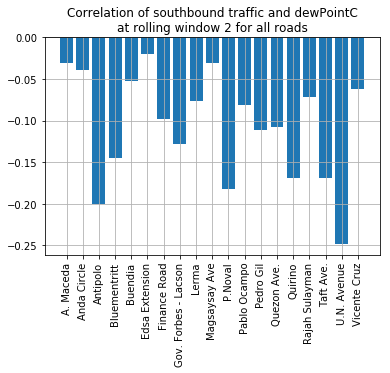

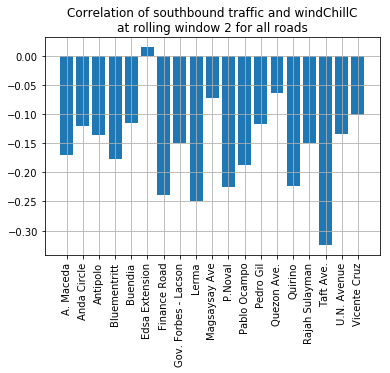

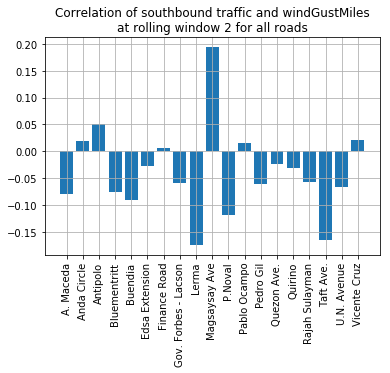

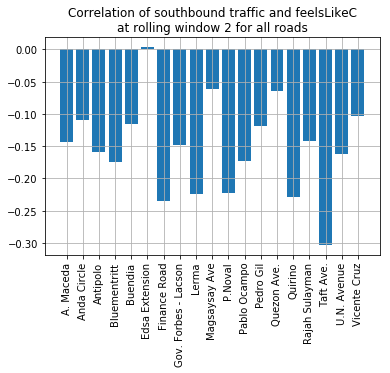

In [25]:
# for W=1
w = 0
r = 0
    
for f in range(3, len(ROADS_SB_CR[0].columns)): 
    y = []
    if f not in rMean[w]:
        continue
    for r in ROADS_SB_CR:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.xticks(rotation='vertical')
    plt.title("Correlation of southbound traffic and " + ROADS_SB_CR[0].columns[f].split("_")[0] 
              + "\nat rolling window " + ROADS_SB_CR[0].columns[f].split("=")[1] + " for all roads")
    plt.grid()
    plt.show()

#### One Graph = One Feature for all Windows of all Roads

tempC for Road: A. Maceda
tempC_Rmean=2 : -0.1705458979210182 : 69
tempC_Rmean=3 : -0.1727887291778859 : 105
tempC_Rmean=4 : -0.18292545922891715 : 141
tempC_Rmean=8 : -0.2049532891705904 : 177
tempC_Rmean=12 : -0.2238813147952615 : 213
tempC_Rmean=24 : -0.2704009279224345 : 249
tempC_Rmean=32 : -0.2884100896372446 : 285
tempC_Rmean=48 : -0.2797447617496156 : 321
tempC_Rmean=96 : -0.14245286661988646 : 357
Max for Road A. Maceda:0.2884100896372446


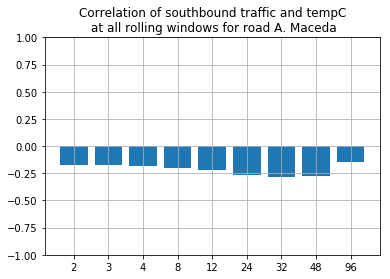

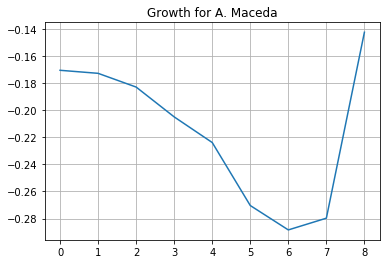

tempC for Road: Anda Circle
tempC_Rmean=2 : -0.12001294690296488 : 69
tempC_Rmean=3 : -0.11511591529332987 : 105
tempC_Rmean=4 : -0.12510869490176438 : 141
tempC_Rmean=8 : -0.1344644371773169 : 177
tempC_Rmean=12 : -0.1409030391535909 : 213
tempC_Rmean=24 : -0.1543158497641877 : 249
tempC_Rmean=32 : -0.15500732563859035 : 285
tempC_Rmean=48 : -0.13976080162836094 : 321
tempC_Rmean=96 : -0.1250114013730282 : 357
Max for Road Anda Circle:0.15500732563859035


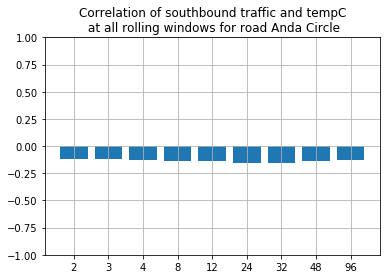

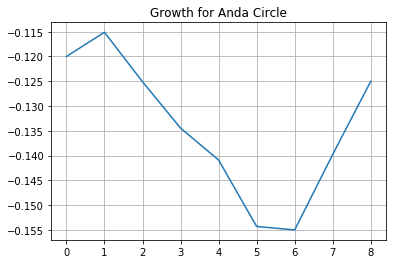

tempC for Road: Antipolo
tempC_Rmean=2 : -0.13511809346105158 : 69
tempC_Rmean=3 : -0.14477986596953976 : 105
tempC_Rmean=4 : -0.13561924068978093 : 141
tempC_Rmean=8 : -0.1331320264481237 : 177
tempC_Rmean=12 : -0.12887942839173255 : 213
tempC_Rmean=24 : -0.09891719214441942 : 249
tempC_Rmean=32 : -0.06868396550595215 : 285
tempC_Rmean=48 : 0.012933228073832731 : 321
tempC_Rmean=96 : 0.1380953551955901 : 357
Max for Road Antipolo:0.14477986596953976


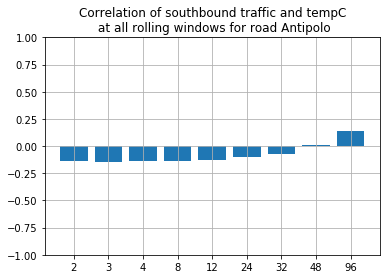

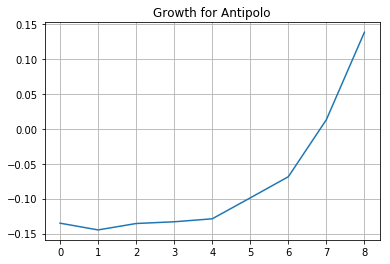

tempC for Road: Bluementritt
tempC_Rmean=2 : -0.17680103970709155 : 69
tempC_Rmean=3 : -0.17484591192419333 : 105
tempC_Rmean=4 : -0.18306891443662013 : 141
tempC_Rmean=8 : -0.19082961776244503 : 177
tempC_Rmean=12 : -0.1945282665578596 : 213
tempC_Rmean=24 : -0.19259748367673635 : 249
tempC_Rmean=32 : -0.177215183497718 : 285
tempC_Rmean=48 : -0.11717436064978685 : 321
tempC_Rmean=96 : -2.4844565846919808e-05 : 357
Max for Road Bluementritt:0.1945282665578596


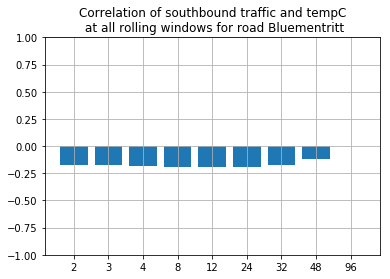

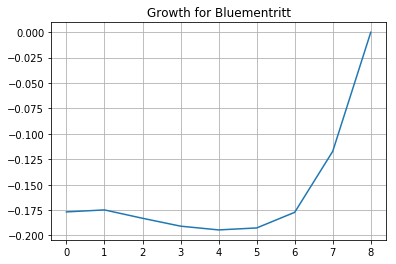

tempC for Road: Buendia
tempC_Rmean=2 : -0.11569894932363255 : 69
tempC_Rmean=3 : -0.11809382161653904 : 105
tempC_Rmean=4 : -0.11725795319263375 : 141
tempC_Rmean=8 : -0.11825217979288308 : 177
tempC_Rmean=12 : -0.11707521851878055 : 213
tempC_Rmean=24 : -0.09982762954697064 : 249
tempC_Rmean=32 : -0.07771648402619694 : 285
tempC_Rmean=48 : -0.013117251862186688 : 321
tempC_Rmean=96 : 0.058925893530546 : 357
Max for Road Buendia:0.11825217979288308


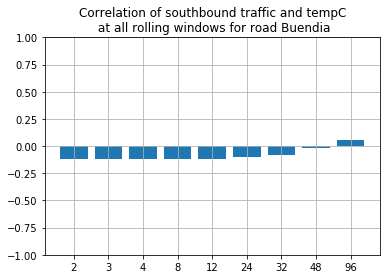

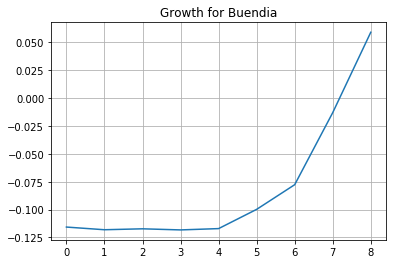

tempC for Road: Edsa Extension
tempC_Rmean=2 : 0.014637220764572247 : 69
tempC_Rmean=3 : 0.01610653918120119 : 105
tempC_Rmean=4 : 0.015161768976505754 : 141
tempC_Rmean=8 : 0.016464295015108578 : 177
tempC_Rmean=12 : 0.018455703541212582 : 213
tempC_Rmean=24 : 0.02525037108972525 : 249
tempC_Rmean=32 : 0.031133709918180506 : 285
tempC_Rmean=48 : 0.0433313844078199 : 321
tempC_Rmean=96 : 0.053598849668903485 : 357
Max for Road Edsa Extension:0.053598849668903485


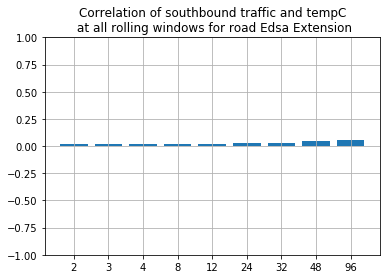

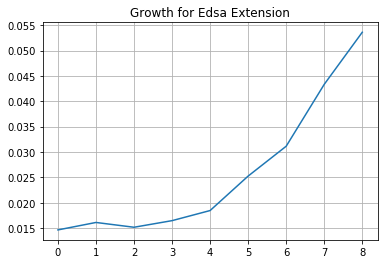

tempC for Road: Finance Road
tempC_Rmean=2 : -0.23872453530448154 : 69
tempC_Rmean=3 : -0.2475794759790575 : 105
tempC_Rmean=4 : -0.24622881190872786 : 141
tempC_Rmean=8 : -0.2581971322335314 : 177
tempC_Rmean=12 : -0.2674570136793936 : 213
tempC_Rmean=24 : -0.2717772994656592 : 249
tempC_Rmean=32 : -0.25700954200143555 : 285
tempC_Rmean=48 : -0.1860478494578014 : 321
tempC_Rmean=96 : -0.0668470263128688 : 357
Max for Road Finance Road:0.2717772994656592


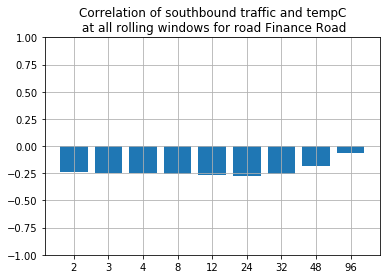

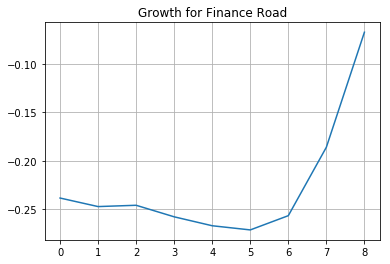

tempC for Road: Gov. Forbes - Lacson
tempC_Rmean=2 : -0.15012492050032594 : 69
tempC_Rmean=3 : -0.1474655273811772 : 105
tempC_Rmean=4 : -0.15362317651929147 : 141
tempC_Rmean=8 : -0.15767975217390526 : 177
tempC_Rmean=12 : -0.15735965521141054 : 213
tempC_Rmean=24 : -0.1435979906115544 : 249
tempC_Rmean=32 : -0.1244261687430119 : 285
tempC_Rmean=48 : -0.07493140167044092 : 321
tempC_Rmean=96 : -0.014117969340660818 : 357
Max for Road Gov. Forbes - Lacson:0.15767975217390526


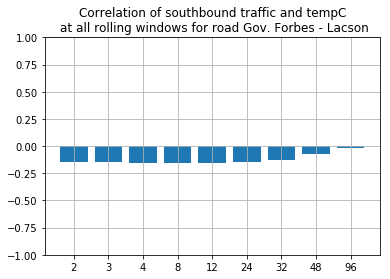

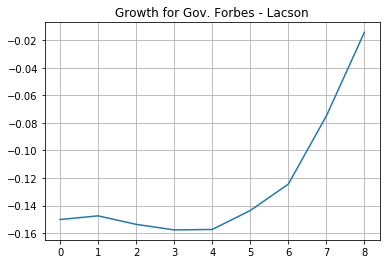

tempC for Road: Lerma
tempC_Rmean=2 : -0.24884090057014455 : 69
tempC_Rmean=3 : -0.2544646404290673 : 105
tempC_Rmean=4 : -0.2657530354159355 : 141
tempC_Rmean=8 : -0.2966551798588421 : 177
tempC_Rmean=12 : -0.3231596353464343 : 213
tempC_Rmean=24 : -0.3788736353546375 : 249
tempC_Rmean=32 : -0.39008054410670384 : 285
tempC_Rmean=48 : -0.3367948111954145 : 321
tempC_Rmean=96 : -0.124446524757606 : 357
Max for Road Lerma:0.39008054410670384


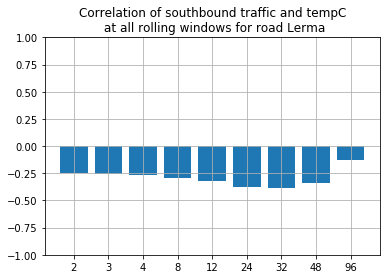

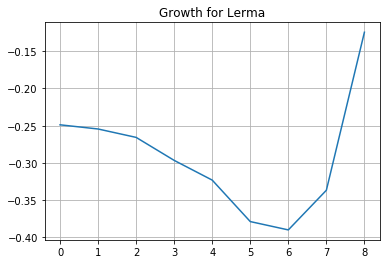

tempC for Road: Magsaysay Ave
tempC_Rmean=2 : -0.07212385646429538 : 69
tempC_Rmean=3 : -0.07269430840083334 : 105
tempC_Rmean=4 : -0.07178122257273452 : 141
tempC_Rmean=8 : -0.07163999281569254 : 177
tempC_Rmean=12 : -0.07246551416158073 : 213
tempC_Rmean=24 : -0.07899961168031899 : 249
tempC_Rmean=32 : -0.08684862705868439 : 285
tempC_Rmean=48 : -0.1094707047377718 : 321
tempC_Rmean=96 : -0.1428624764687173 : 357
Max for Road Magsaysay Ave:0.1428624764687173


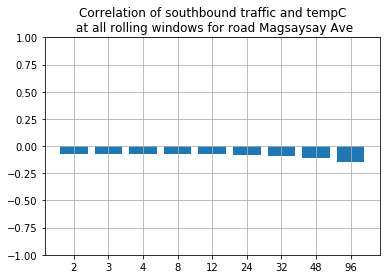

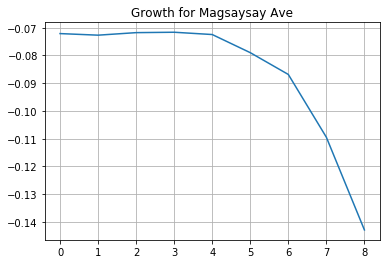

tempC for Road: P.Noval
tempC_Rmean=2 : -0.2253644842887058 : 69
tempC_Rmean=3 : -0.2322432717981445 : 105
tempC_Rmean=4 : -0.2382663496300684 : 141
tempC_Rmean=8 : -0.2600970680737291 : 177
tempC_Rmean=12 : -0.2782245972378758 : 213
tempC_Rmean=24 : -0.3081871055644869 : 249
tempC_Rmean=32 : -0.3055343629108801 : 285
tempC_Rmean=48 : -0.2426974666833639 : 321
tempC_Rmean=96 : -0.016009451266941557 : 357
Max for Road P.Noval:0.3081871055644869


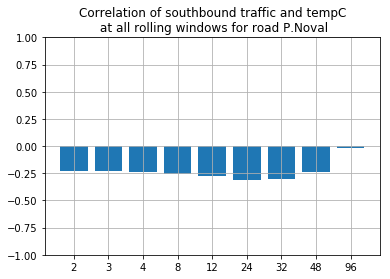

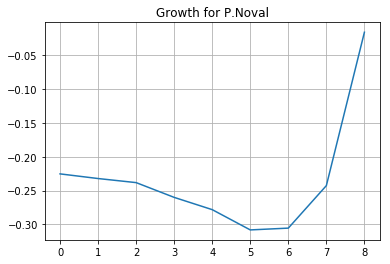

tempC for Road: Pablo Ocampo
tempC_Rmean=2 : -0.18658687906666727 : 69
tempC_Rmean=3 : -0.18913462133365372 : 105
tempC_Rmean=4 : -0.19588040154022565 : 141
tempC_Rmean=8 : -0.2116003762019498 : 177
tempC_Rmean=12 : -0.2240468432320201 : 213
tempC_Rmean=24 : -0.2447045566865892 : 249
tempC_Rmean=32 : -0.2421962679937277 : 285
tempC_Rmean=48 : -0.1986292432149152 : 321
tempC_Rmean=96 : -0.06230182621788484 : 357
Max for Road Pablo Ocampo:0.2447045566865892


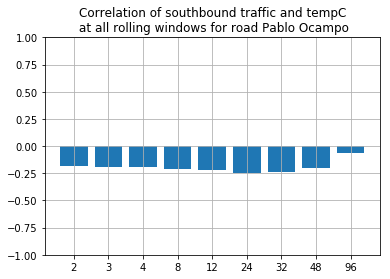

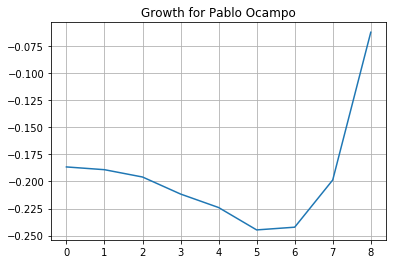

tempC for Road: Pedro Gil
tempC_Rmean=2 : -0.1158928893471828 : 69
tempC_Rmean=3 : -0.12612171578100256 : 105
tempC_Rmean=4 : -0.1232646007475313 : 141
tempC_Rmean=8 : -0.1349856064374032 : 177
tempC_Rmean=12 : -0.1436481791309426 : 213
tempC_Rmean=24 : -0.1476749531320327 : 249
tempC_Rmean=32 : -0.1335104159490018 : 285
tempC_Rmean=48 : -0.0649286346231636 : 321
tempC_Rmean=96 : 0.09622335981421286 : 357
Max for Road Pedro Gil:0.1476749531320327


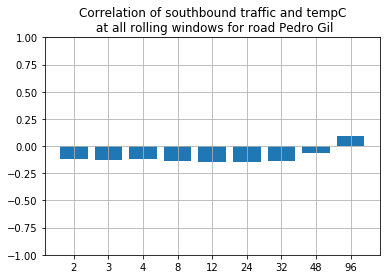

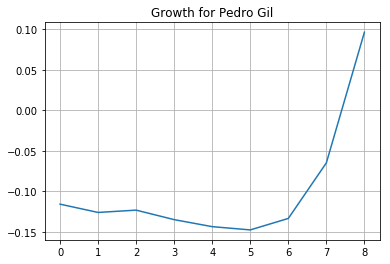

tempC for Road: Quezon Ave.
tempC_Rmean=2 : -0.0637477896803266 : 69
tempC_Rmean=3 : -0.0694409490233096 : 105
tempC_Rmean=4 : -0.07236168118759784 : 141
tempC_Rmean=8 : -0.08882697461163942 : 177
tempC_Rmean=12 : -0.1046493726348739 : 213
tempC_Rmean=24 : -0.14193719481612604 : 249
tempC_Rmean=32 : -0.15553081655738552 : 285
tempC_Rmean=48 : -0.14678818721583187 : 321
tempC_Rmean=96 : -0.015215476735740176 : 357
Max for Road Quezon Ave.:0.15553081655738552


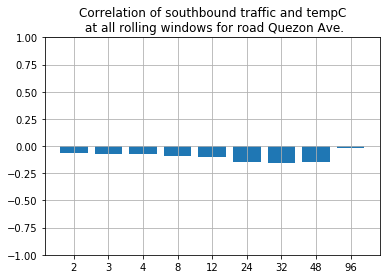

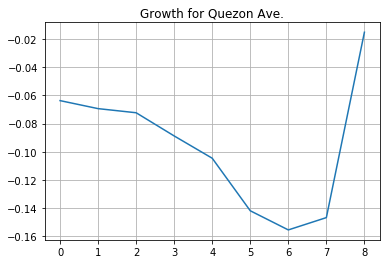

tempC for Road: Quirino
tempC_Rmean=2 : -0.2231285309475772 : 69
tempC_Rmean=3 : -0.22005061994120564 : 105
tempC_Rmean=4 : -0.2259014712210958 : 141
tempC_Rmean=8 : -0.22735048716665066 : 177
tempC_Rmean=12 : -0.22393018117942687 : 213
tempC_Rmean=24 : -0.1952223159898115 : 249
tempC_Rmean=32 : -0.16151024084444204 : 285
tempC_Rmean=48 : -0.06808973291367731 : 321
tempC_Rmean=96 : 0.01906994271660125 : 357
Max for Road Quirino:0.22735048716665066


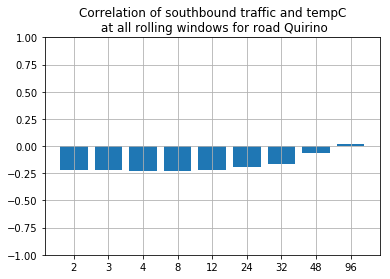

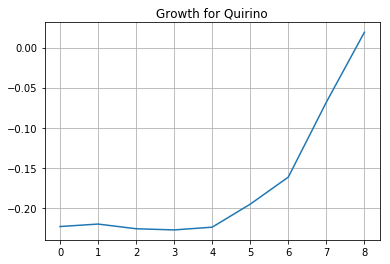

tempC for Road: Rajah Sulayman
tempC_Rmean=2 : -0.14864414795301326 : 69
tempC_Rmean=3 : -0.15070196229901267 : 105
tempC_Rmean=4 : -0.15563143991682174 : 141
tempC_Rmean=8 : -0.16786488612788353 : 177
tempC_Rmean=12 : -0.17724161545510572 : 213
tempC_Rmean=24 : -0.1944265892149943 : 249
tempC_Rmean=32 : -0.19505199856313027 : 285
tempC_Rmean=48 : -0.1699649787601091 : 321
tempC_Rmean=96 : -0.10972731122744438 : 357
Max for Road Rajah Sulayman:0.19505199856313027


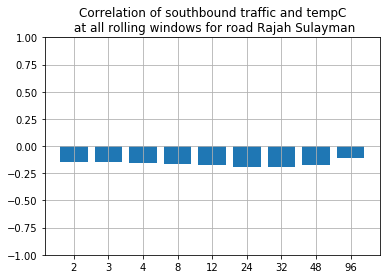

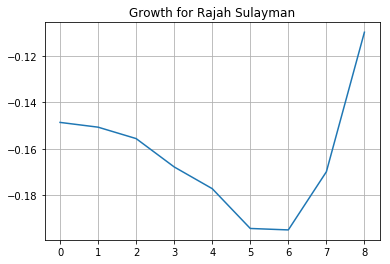

tempC for Road: Taft Ave.
tempC_Rmean=2 : -0.3241697763722792 : 69
tempC_Rmean=3 : -0.33088130992528586 : 105
tempC_Rmean=4 : -0.3423605688294528 : 141
tempC_Rmean=8 : -0.37342446395717904 : 177
tempC_Rmean=12 : -0.3987435975625816 : 213
tempC_Rmean=24 : -0.4439637191755858 : 249
tempC_Rmean=32 : -0.4424008985009254 : 285
tempC_Rmean=48 : -0.35710233518578416 : 321
tempC_Rmean=96 : -0.09045791974010324 : 357
Max for Road Taft Ave.:0.4439637191755858


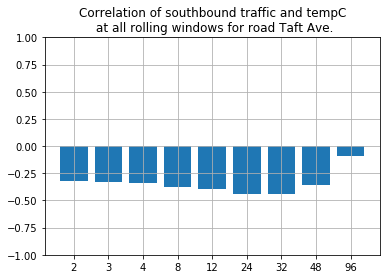

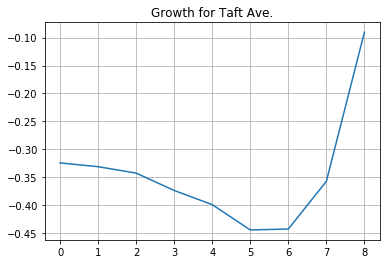

tempC for Road: U.N. Avenue
tempC_Rmean=2 : -0.13431623847320698 : 69
tempC_Rmean=3 : -0.13728803160159125 : 105
tempC_Rmean=4 : -0.13946268714710305 : 141
tempC_Rmean=8 : -0.14575522109926387 : 177
tempC_Rmean=12 : -0.14757551428443855 : 213
tempC_Rmean=24 : -0.13056988370064573 : 249
tempC_Rmean=32 : -0.10221203242910128 : 285
tempC_Rmean=48 : -0.008487059158781141 : 321
tempC_Rmean=96 : 0.14764396023582313 : 357
Max for Road U.N. Avenue:0.14764396023582313


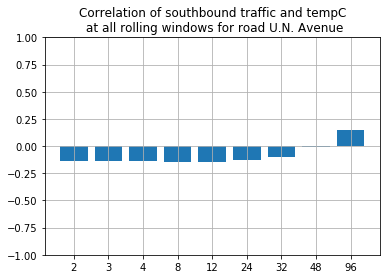

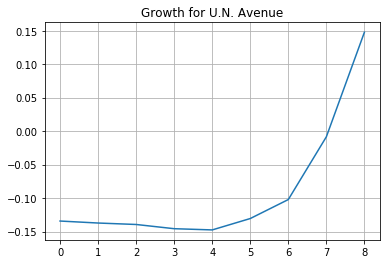

tempC for Road: Vicente Cruz
tempC_Rmean=2 : -0.10243854352155828 : 69
tempC_Rmean=3 : -0.10485540578080316 : 105
tempC_Rmean=4 : -0.10452701344565173 : 141
tempC_Rmean=8 : -0.09599680420882904 : 177
tempC_Rmean=12 : -0.0803792375326106 : 213
tempC_Rmean=24 : -0.008045368851122784 : 249
tempC_Rmean=32 : 0.028990987523746525 : 285
tempC_Rmean=48 : 0.015000353983830062 : 321
tempC_Rmean=96 : 0.003034459087458367 : 357
Max for Road Vicente Cruz:0.10485540578080316


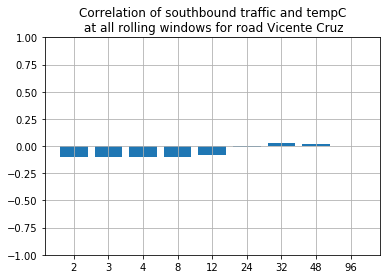

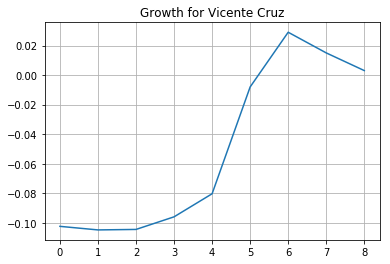

In [26]:
w = 0
r = 0
feature = 'tempC'
y = []

for r in range(len(ROADS_1)):
    y = []
    print(feature + " for Road: " + ROADS_1[r])
    for w in range(len(WINDOWS)):
        for f in range(3, len(ROADS_SB_CR[r].columns)): 
            if f not in rMean[w]:
                continue
            elif feature not in ROADS_SB_CR[r].columns[f]:
                continue
            print(str(ROADS_SB_CR[r].columns[f]) + " : " + str(ROADS_SB_CR[r].iloc[0, f]) + " : " + str(f))
            y.append(ROADS_SB_CR[r].iloc[0, f])
            
    print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
    plt.bar(np.arange(len(WINDOWS)), y)
    plt.ylim(ymax=1, ymin=-1)
    plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
    plt.grid()
    
    plt.title("Correlation of southbound traffic and " + feature
              + "\n at all rolling windows for road " + ROADS_1[r])
    
    #plt.title(feature + " of " + ROADS_1[r])
    plt.show()
    
    plt.plot(y)
    plt.grid()
    plt.title("Growth for " + ROADS_1[r])

    plt.show()

<br><br><br>
## ROLLING - NORTHBOUND

In [27]:
rMean = []
for w in WINDOWS:
    rMeanColumns = []
    window = w
    #Figuring out what columns are rolling mean
    for c in range(len(CORR_R[0].columns)):
        col = ROADS_NB_CR[0].columns[c]
        for f in FEATURES:
            if((f+"_Rmean=" + str(window)) == col):
                rMeanColumns.append(c)
    rMean.append(rMeanColumns)

#### One Graph = All Features of Window w of Road r

0.9879678343355679
0.2530887842643641
-0.295521988794261
-0.06776980298605907
-0.016929324486635883
0.2691080148052448
0.0012397596112947945
-0.08025166701219963
0.014521829331291643
-0.2879907255827712
-0.1596421865674929
-0.2953700008676361
-0.02917084134483401
-0.2879907255827712


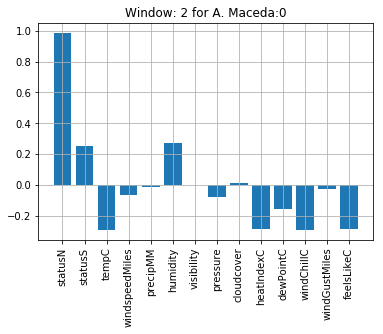

0.9930553637051469
0.5476386620133263
-0.12860249540650798
-0.03812659532130843
0.06660735263699782
0.15857488014142562
-0.0729133969199038
0.04798287925966098
0.06759743785388396
-0.10273155415642844
0.019645792079408555
-0.12832516473600078
-0.013379611881427174
-0.10273155415642844


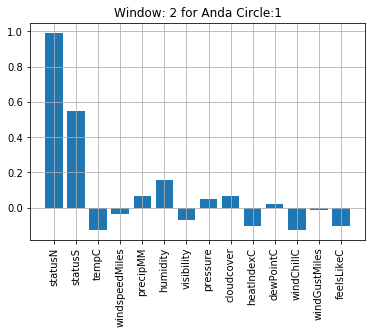

0.9904351026174192
0.4039846576435206
-0.3152810292003018
-0.0947197735724548
-0.030400339803221224
0.2768588199862095
0.025730541408755657
-0.0686620345924711
0.005027733767703899
-0.3191913650784706
-0.2107744726663092
-0.31572160206639044
-0.048199413612173565
-0.3191913650784706


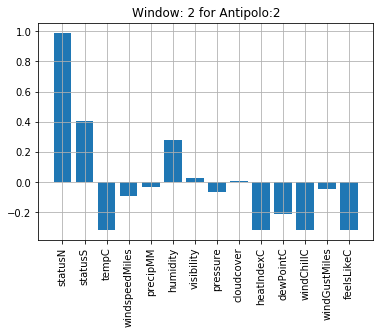

0.9868823773982948
0.4255436374386452
-0.24007403853151965
-0.0922781342040567
-0.08275673390206763
0.20036617703595927
0.05237328755969914
0.015094059373585881
-0.009663981402263051
-0.2471464687339921
-0.16850553847886449
-0.2403111147354657
-0.0634574242264629
-0.2471464687339921


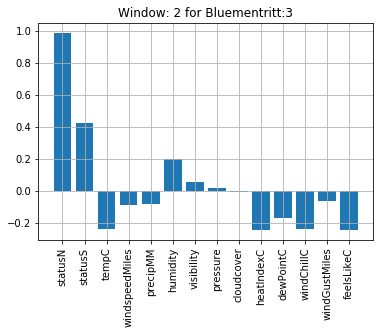

0.9974754552909718
0.15548516483499245
-0.07016593444388508
-0.04914333898617397
-0.06220566048669132
0.04510530237243664
0.04009530762406307
-0.024676668458241038
0.0022350157399654287
-0.0719908003905891
-0.0224646849338128
-0.07018448479505611
-0.05003298242316838
-0.0719908003905891


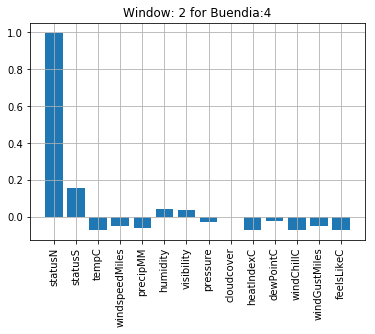

0.9980281673294896
0.1927336528909256
-0.017977662387775973
0.0518158727395528
-0.07718459661127604
-0.051887833737555115
0.06607772561675848
0.0071028669459693465
0.05303343536726162
-0.034294604312027445
-0.1057642687280228
-0.018216388545937132
0.04921144659799855
-0.034294604312027445


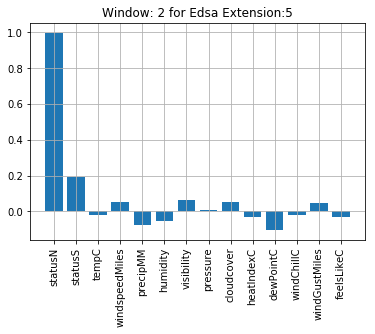

0.9907291845362708
0.5685945076478781
-0.14514383331083305
-0.011994776143455777
0.051381548538347824
0.1435052509258566
-0.030137673324014243
-0.11684605461385725
0.08076447574089211
-0.15094690295603566
-0.0729942204276776
-0.14525147140624636
0.008929711307541657
-0.15094690295603566


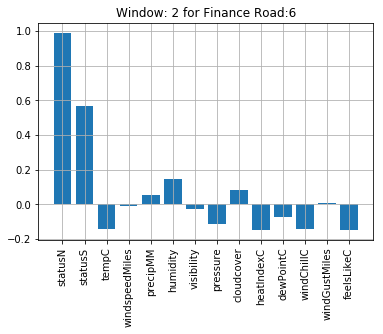

0.9871336524753392
0.41300345739117417
-0.2298322088804493
-0.06366968729580158
-0.04252202617637117
0.2060981837629293
0.04655934305437432
-0.034786340558117315
-0.05059038867108851
-0.2362204101947833
-0.17423852500130962
-0.2296030663798215
-0.022104489141910943
-0.2362204101947833


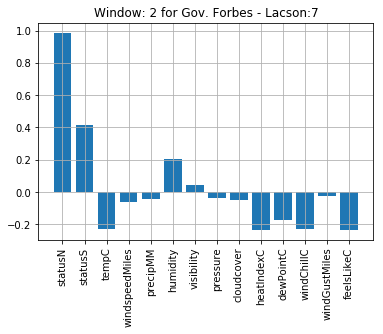

0.9925942206409546
0.2463802656467683
-0.09011799488350968
-0.03804443494694544
-0.022256437760966526
0.08454407827333091
0.0087980870635708
-0.008705994864085746
-0.007931567448487591
-0.08144867108336926
-0.028575058775768238
-0.09022049186998177
-0.03976887060604007
-0.08144867108336926


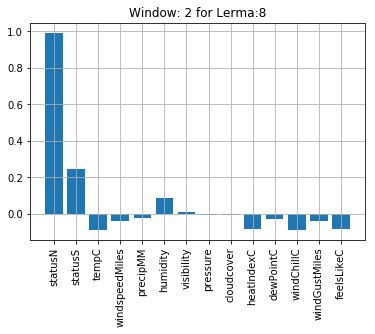

0.9863807111523456
0.012953522948347488
-0.05612218797223115
0.0580373164256629
0.044477737156348944
0.03342145011009074
-0.02840729440303375
-0.08369574347852829
0.02990706162432588
-0.06842873062369574
-0.08999989553668117
-0.0563560598250059
0.07446119315174489
-0.06842873062369574


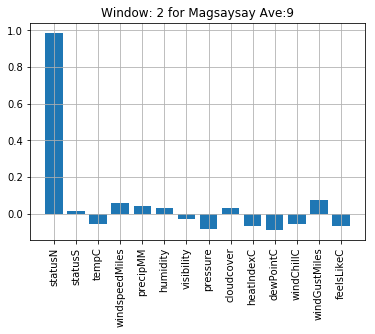

0.9921588025767092
0.2554515501871847
-0.1922177772166777
-0.0381717942305116
0.005434746083889959
0.13568355580992186
0.013185504427526664
-0.036195778741909324
0.04883036776007706
-0.2124106182853764
-0.2174820867334996
-0.1920873421029087
-0.006617940474830412
-0.2124106182853764


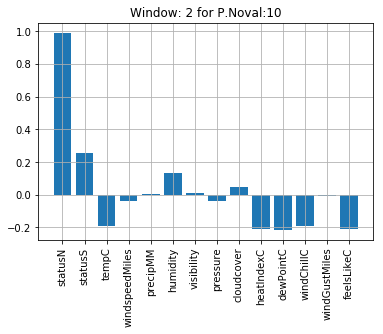

0.9921012461324992
0.4350018759576438
-0.062437260747735264
-0.11638857729529435
-0.20045355980979834
0.010067812909687788
0.1257814602594488
0.03234358283575161
-0.1136433761245372
-0.05196512415848111
-0.06895174513274549
-0.06256827868631347
-0.14154189369329448
-0.05196512415848111


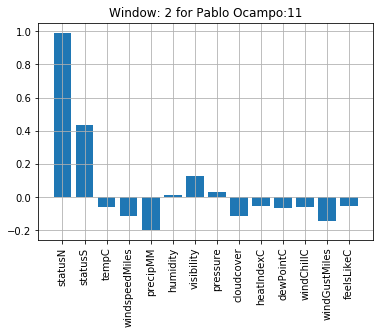

0.9913677169329536
0.4967628226437058
-0.10366505606609827
-0.059307435505765616
0.011109608767597177
0.07914508856931866
0.010950419623553346
-0.0796075124639052
0.02057897173236017
-0.10551661976297064
-0.11135866459270256
-0.10401468796122357
-0.03965932327793531
-0.10551661976297064


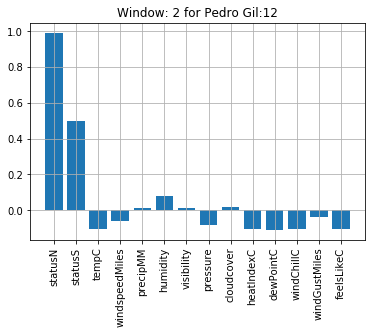

0.9760579400388704
0.11062856183122216
-0.08928566777022028
-0.05362302477636152
-0.06908201907787341
0.04874052867291959
0.056702084001835275
0.011147240765403632
-0.018869694636561157
-0.09825868001538723
-0.10569618038144328
-0.08960004168094601
-0.05042289276867397
-0.09825868001538723


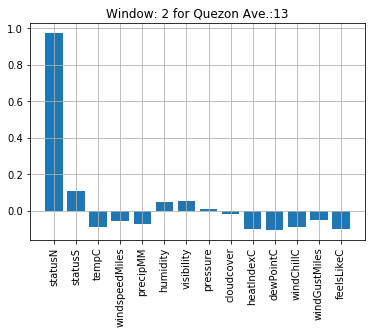

0.990169170431224
0.5603142719947688
-0.1611142932165154
-0.05912210843437728
-0.07954247760157633
0.12876167555365614
0.03758718273058647
-0.053093687790020376
-0.021587732730931317
-0.16323558141861913
-0.15606604319120454
-0.161324789759987
-0.05086904163972654
-0.16323558141861913


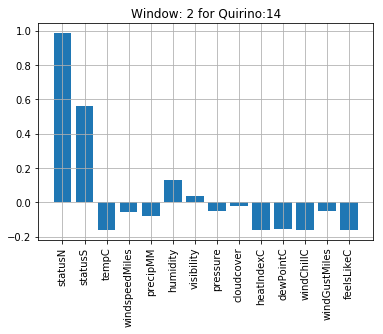

0.9904810569033936
0.5018001682514597
-0.1659806711022699
-0.013730195082010113
0.015295630200990269
0.13774583644106786
-0.022974699091851142
0.08771157968528727
0.10077749697864806
-0.14719087130773906
-0.07242873949799067
-0.16616520011190672
-0.0065501971718344145
-0.14719087130773906


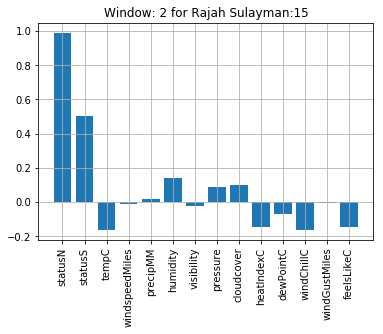

0.9901782935930836
0.24031451048466465
-0.07247269882910838
-0.03024605133145545
-0.02881792449995845
0.056484072433279166
0.0326416053789623
-0.05929464618561256
-0.008807161553536098
-0.08007633285761621
-0.08572857846114344
-0.07240798483757244
-0.03113956257270655
-0.08007633285761621


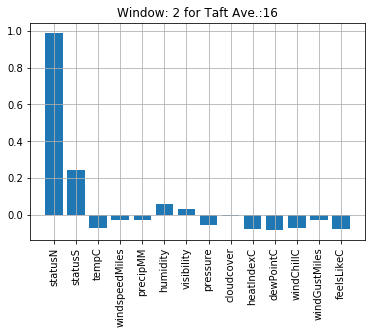

0.9958322793567492
0.7098965365286259
-0.14286022239218174
-0.11370879881842427
-0.11646126859454307
0.10859624479324267
0.01833833873583231
0.01724536063072993
-0.09485022313966253
-0.1650383652246892
-0.2184333996536908
-0.14304176846516686
-0.0904628591722947
-0.1650383652246892


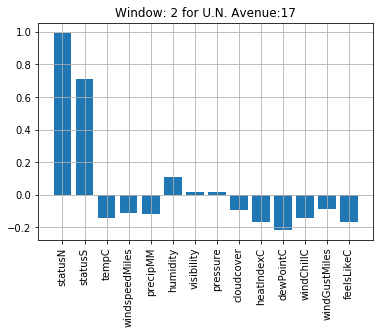

0.951238867998664
0.10778806946387252
-0.3609054534690907
-0.12395059253521525
-0.04191117599692182
0.3062726448850977
0.08159304899358366
-0.041697949892843936
0.03080508158092734
-0.3689834399201444
-0.23310492751118925
-0.3610047336252708
-0.06767504034561624
-0.3689834399201444


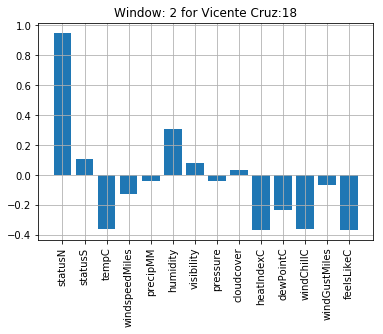

In [28]:
# for W=1
w = 0

for r in range(len(ROADS_1)): 
    y = []
    for f in range(3, len(ROADS_NB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        print(ROADS_NB_CR[r].iloc[0, f])
        y.append(ROADS_NB_CR[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.grid()
    plt.xticks(rotation='vertical')
    plt.title("Window: " + str(WINDOWS[w]) + " for " + ROADS_1[r] + ":" + str(r))

    plt.show()

In [29]:
ROADS_NB_CR[17]

Features  statusN   statusS  statusN_Rmean=2  statusS_Rmean=2  \
0  statusN      1.0  0.710869         0.995832         0.709897   

   statusN_Rmin=2  statusS_Rmin=2  statusN_Rmax=2  statusS_Rmax=2  \
0        0.994261        0.708652        0.994131        0.707843   

   statusN_Rmean=3         ...          precipMM_Rmax=96  humidity_Rmax=96  \
0         0.987382         ...                 -0.032274          -0.13721   

   visibility_Rmax=96  pressure_Rmax=96  cloudcover_Rmax=96  \
0           -0.080327         -0.039752            -0.08129   

   heatIndexC_Rmax=96  dewPointC_Rmax=96  windChillC_Rmax=96  \
0            0.061665          -0.098366            0.139734   

   windGustMiles_Rmax=96  feelsLikeC_Rmax=96  
0              -0.003784            0.061665  

[1 rows x 393 columns]

0.951238867998664
0.10778806946387252
-0.3609054534690907
-0.12395059253521525
-0.04191117599692182
0.3062726448850977
0.08159304899358366
-0.041697949892843936
0.03080508158092734
-0.3689834399201444
-0.23310492751118925
-0.3610047336252708
-0.06767504034561624
-0.3689834399201444


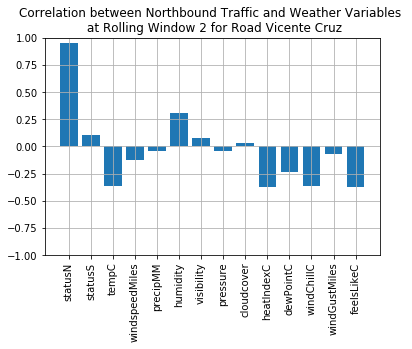

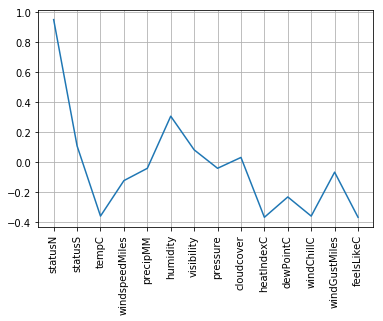

Max for WINDOW 2:0.3689834399201444
0.8686268521737529
0.10425237054303997
-0.3673572664871053
-0.11681646559434615
-0.02241893644893848
0.3104229646030435
0.07864264581822507
-0.03484394139712648
0.03510410508774079
-0.3707480051873941
-0.23676952226141906
-0.3675698977327714
-0.0600394411333058
-0.3707480051873941


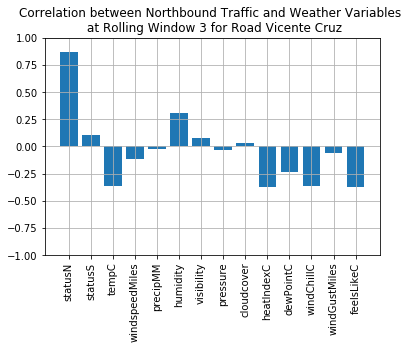

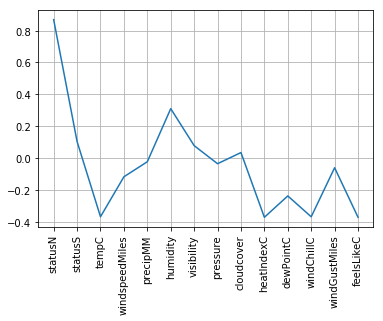

Max for WINDOW 3:0.3707480051873941
0.7830107950286105
0.09771985489706343
-0.3636821500531492
-0.10043086039640364
-0.0068544656080133
0.3099142554046087
0.07266655818193532
-0.03144238321259178
0.03955860660151194
-0.3723824178383925
-0.23396952307243365
-0.3636087762167218
-0.0487525664983075
-0.3723824178383925


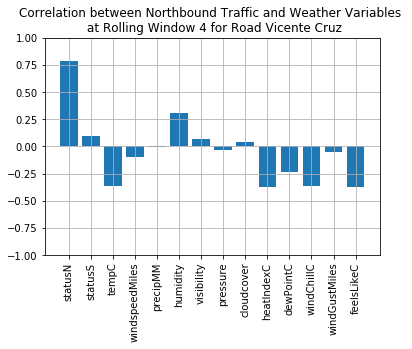

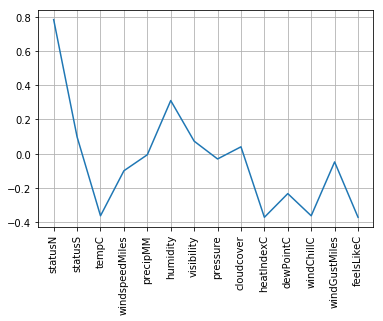

Max for WINDOW 4:0.3723824178383925
0.5257356865696508
0.05965135192102525
-0.3207656116492686
-0.06407666527195523
0.047216222486662886
0.2861017823044369
0.04019872006848524
-0.016264630543969594
0.05693452647199975
-0.34198831242205513
-0.20281918969848248
-0.3204605504204169
0.0017632172151383339
-0.34198831242205513


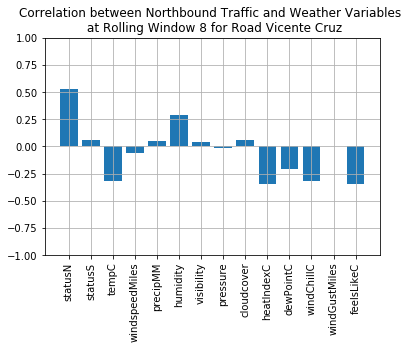

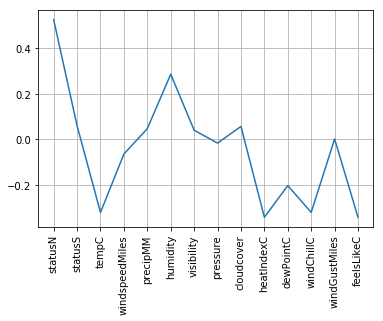

Max for WINDOW 8:0.34198831242205513
0.34019819896531545
0.016935933202515494
-0.2364878136693657
0.0027143554624948925
0.08968875769636367
0.2274054900814458
0.0018138002473322707
-0.028574806375524463
0.07080492119242532
-0.2622613922954312
-0.139912846404443
-0.23638860868374484
0.06729208506609696
-0.2622613922954312


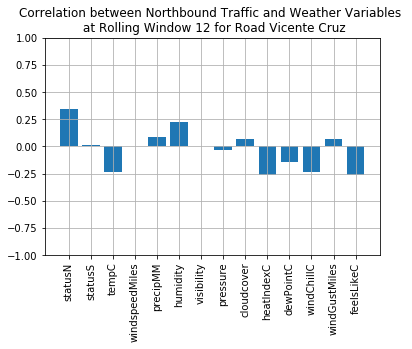

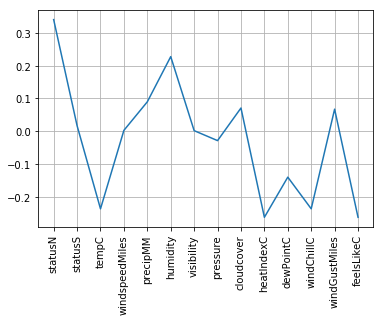

Max for WINDOW 12:0.2622613922954312
0.013081111714718204
0.023618983198929532
0.1317464253103483
0.1923941425444446
0.18505146420393992
-0.08617960576483953
-0.15834780524283418
-0.13844400665335138
0.09964890271494596
0.13323701769467258
0.11687186889914808
0.13181185843315155
0.2042826625923255
0.13323701769467258


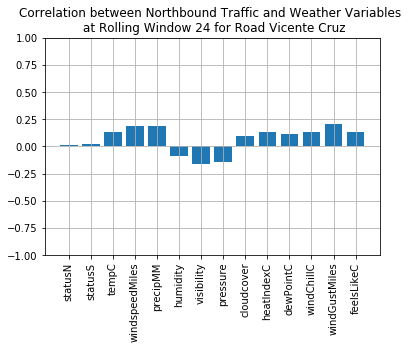

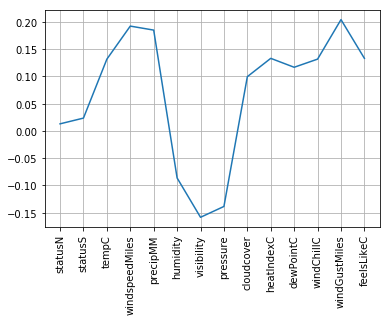

Max for WINDOW 24:0.2042826625923255
-0.078534233161855
0.0408944195916648
0.31721664132486194
0.1756117699849107
0.1435546332859848
-0.2747576860615711
-0.1405360573622949
-0.15141233169197188
0.0855416765025671
0.33504788531447977
0.1849812292533183
0.31752011955645976
0.1433219733638053
0.33504788531447977


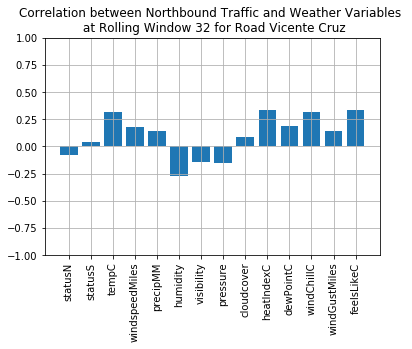

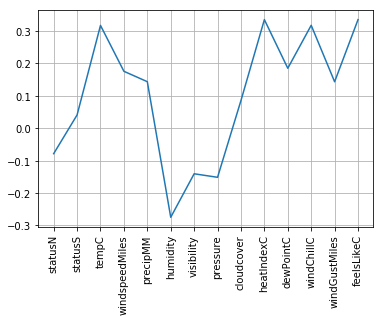

Max for WINDOW 32:0.33504788531447977
0.034084095444953354
0.06696229074213979
0.1770661662564491
-0.04254498646175295
-0.01701980749112649
-0.1651657613888909
-0.009148572986154941
-0.08352344357469545
-0.017469602389977194
0.20075512861918912
0.09484151416322913
0.1772496483586373
-0.09331124279388356
0.20075512861918912


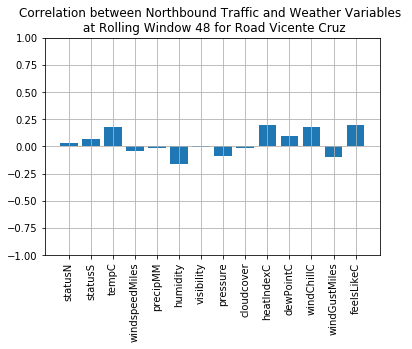

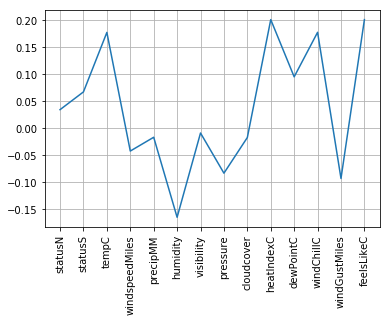

Max for WINDOW 48:0.20075512861918912
0.036934013447634015
0.07419702113025024
0.05067786501626074
0.0034229473286316657
0.017695243985228575
-0.03264911407173116
-0.04475933113247902
-0.054658709992370345
0.00266319950780211
0.05849911493609414
0.013203554252682137
0.0512369193712954
-0.003330159727068085
0.05849911493609414


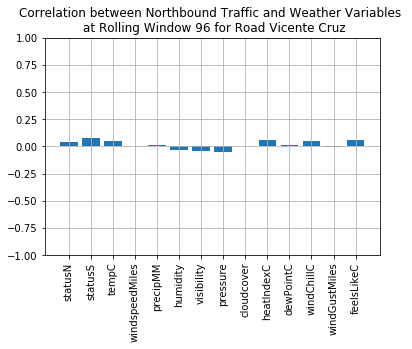

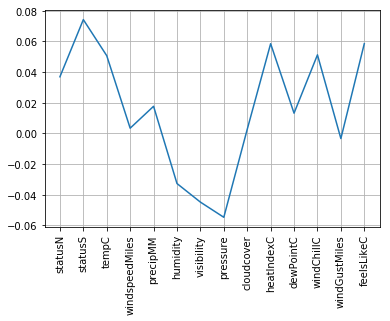

Max for WINDOW 96:0.05849911493609414
Max: 0.3723824178383925
Found in Window: 4


In [30]:
r = 18

maxes = []

fig, ax = plt.subplots()
yGroup = []
fin = False
for w in range(len(WINDOWS)): 
    y = []
    for f in range(3, len(ROADS_NB_CR[r].columns)):
        if f not in rMean[w]:
            continue
        y.append(ROADS_NB_CR[r].iloc[0, f])
        print(ROADS_NB_CR[r].iloc[0, f])
    plt.bar(FEATURES[1:], y)
    plt.xticks(rotation='vertical')
    plt.ylim(ymin=-1, ymax=1)
    plt.grid()
    plt.title("Correlation between Northbound Traffic and Weather Variables \n at Rolling Window " + str(WINDOWS[w]) + " for Road " + ROADS_1[r])    
    plt.show()
    
    plt.plot(y)
    plt.grid()
    plt.xticks(np.arange(len(FEATURES[1:])), FEATURES[1:], rotation='vertical')
    plt.show()
    
    print("Max for WINDOW " + str(WINDOWS[w]) + ":" + str(np.absolute(y[2:]).max()))
    maxes.append(np.absolute(y[2:]).max())
    
print("===============")
print("Max: " + str(np.amax(maxes)))
print("Found in Window: " + str(WINDOWS[np.argmax(maxes)]))

#### One Graph = One Feature of All Roads for Window w

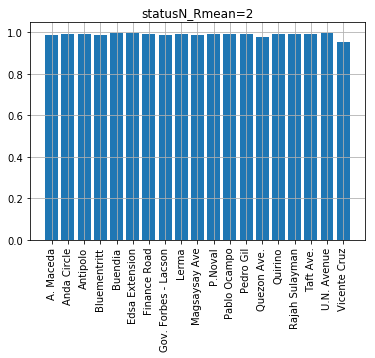

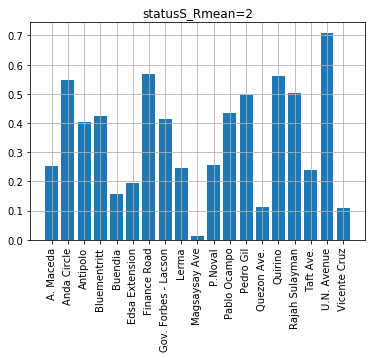

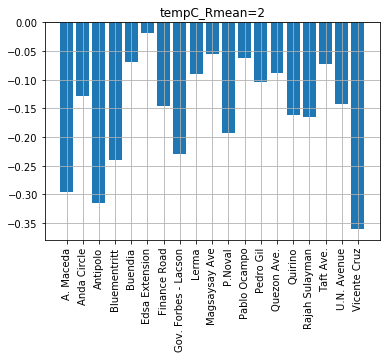

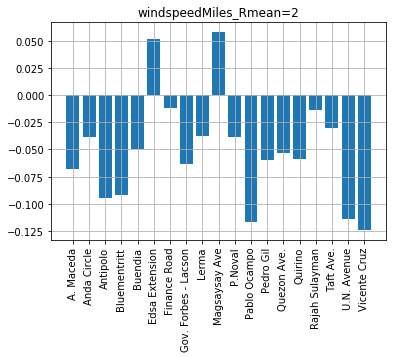

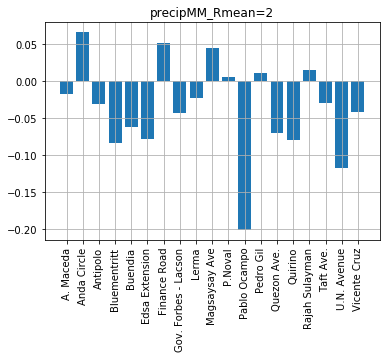

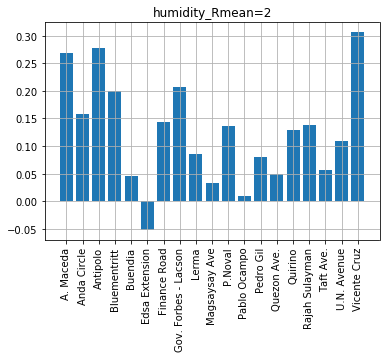

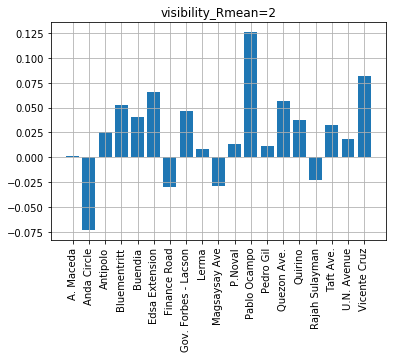

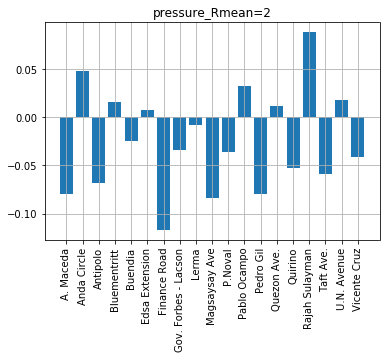

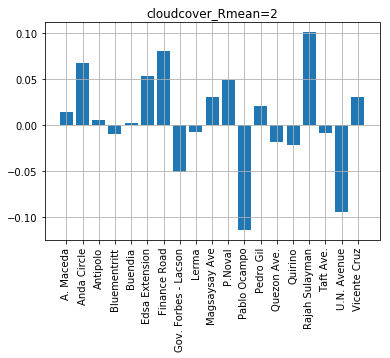

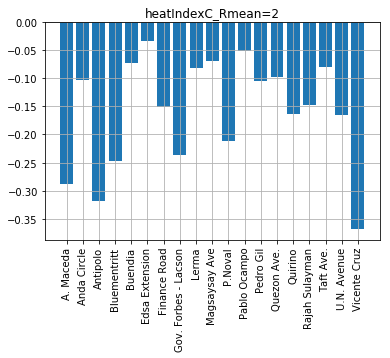

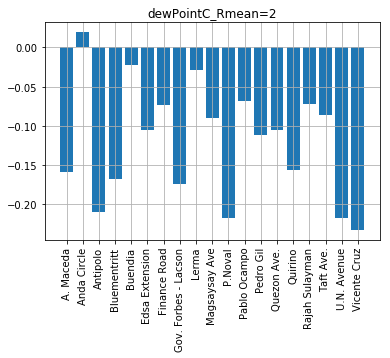

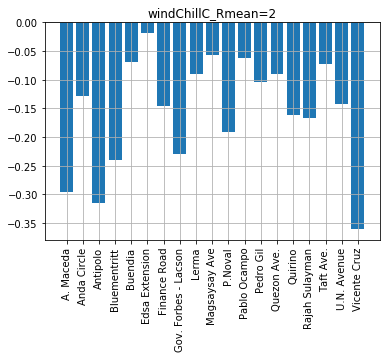

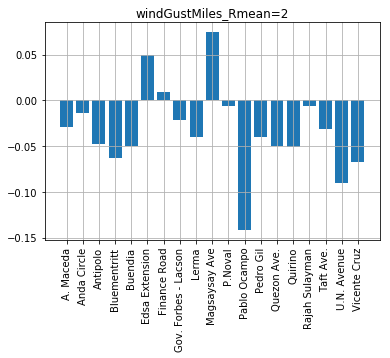

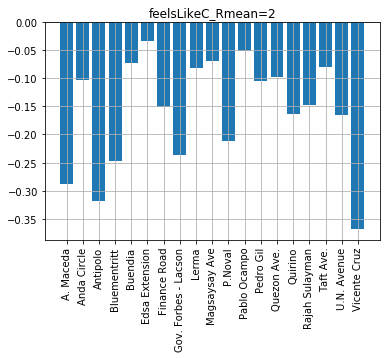

In [31]:
# for W=1
w = 0
r = 0
    
for f in range(3, len(ROADS_NB_CR[0].columns)): 
    y = []
    if f not in rMean[w]:
        continue
    for r in ROADS_NB_CR:
        y.append(r.iloc[0, f])
    plt.bar(ROADS_1, y)
    plt.xticks(rotation='vertical')
    plt.title(ROADS_NB_CR[0].columns[f])
    plt.grid()
    plt.show()

#### One Graph = One Feature for all Windows of all Roads

statusN for Road: A. Maceda
statusN_Rmean=2 : 0.9879678343355679 : 3
statusN_Rmean=3 : 0.9649431016267244 : 9
statusN_Rmean=4 : 0.9385036214592308 : 15
statusN_Rmean=8 : 0.8286083144291226 : 21
statusN_Rmean=12 : 0.7739932421061474 : 27
statusN_Rmean=24 : 0.6559920591685763 : 33
statusN_Rmean=32 : 0.5724198347308249 : 39
statusN_Rmean=48 : 0.44095560335953693 : 45
statusN_Rmean=96 : 0.3581277187804656 : 51
Max for Road A. Maceda:0.9879678343355679


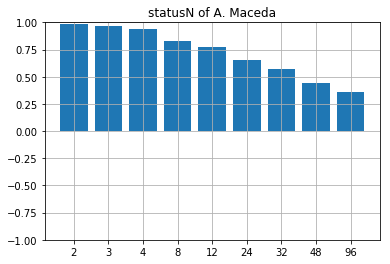

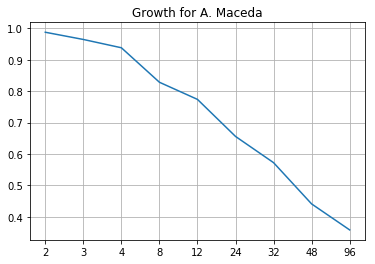

statusN for Road: Anda Circle
statusN_Rmean=2 : 0.9930553637051469 : 3
statusN_Rmean=3 : 0.9809386601923168 : 9
statusN_Rmean=4 : 0.9668373263628758 : 15
statusN_Rmean=8 : 0.901620474369254 : 21
statusN_Rmean=12 : 0.8320133483415183 : 27
statusN_Rmean=24 : 0.6475471954180138 : 33
statusN_Rmean=32 : 0.6061779846857268 : 39
statusN_Rmean=48 : 0.583033133404856 : 45
statusN_Rmean=96 : 0.4802340024303603 : 51
Max for Road Anda Circle:0.9930553637051469


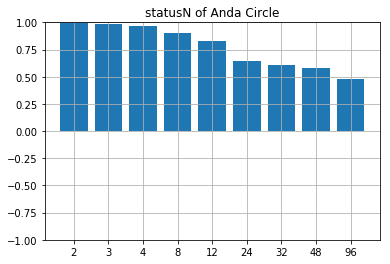

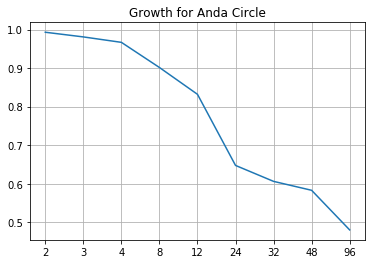

statusN for Road: Antipolo
statusN_Rmean=2 : 0.9904351026174192 : 3
statusN_Rmean=3 : 0.97019764957597 : 9
statusN_Rmean=4 : 0.9464504779487672 : 15
statusN_Rmean=8 : 0.8512968324262679 : 21
statusN_Rmean=12 : 0.8020962736363447 : 27
statusN_Rmean=24 : 0.6631677660994384 : 33
statusN_Rmean=32 : 0.5607453562454594 : 39
statusN_Rmean=48 : 0.39335644691732297 : 45
statusN_Rmean=96 : 0.35693436204378265 : 51
Max for Road Antipolo:0.9904351026174192


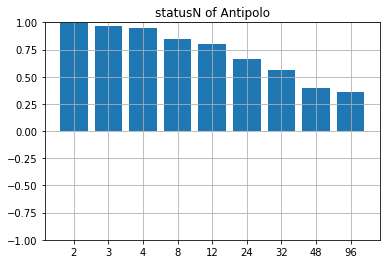

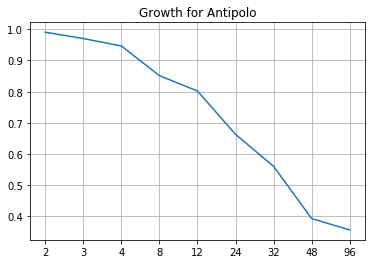

statusN for Road: Bluementritt
statusN_Rmean=2 : 0.9868823773982948 : 3
statusN_Rmean=3 : 0.9634332616771846 : 9
statusN_Rmean=4 : 0.9343060713446596 : 15
statusN_Rmean=8 : 0.8018061496898633 : 21
statusN_Rmean=12 : 0.7036410815916054 : 27
statusN_Rmean=24 : 0.5622163448433726 : 33
statusN_Rmean=32 : 0.4985273097721485 : 39
statusN_Rmean=48 : 0.3967820810303942 : 45
statusN_Rmean=96 : 0.2958444860573225 : 51
Max for Road Bluementritt:0.9868823773982948


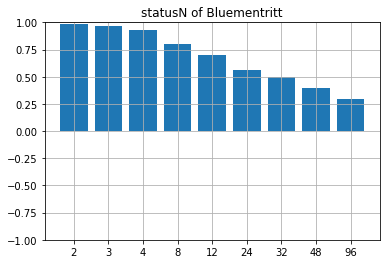

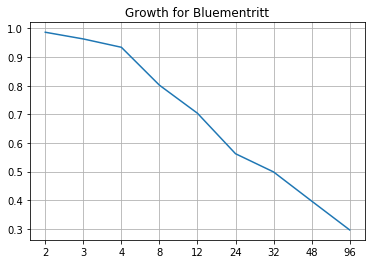

statusN for Road: Buendia
statusN_Rmean=2 : 0.9974754552909718 : 3
statusN_Rmean=3 : 0.9929771448889988 : 9
statusN_Rmean=4 : 0.987080802708337 : 15
statusN_Rmean=8 : 0.9582307111216182 : 21
statusN_Rmean=12 : 0.9244443970862803 : 27
statusN_Rmean=24 : 0.8077931886091629 : 33
statusN_Rmean=32 : 0.7238297120170964 : 39
statusN_Rmean=48 : 0.5661206847585275 : 45
statusN_Rmean=96 : 0.4609701571504354 : 51
Max for Road Buendia:0.9974754552909718


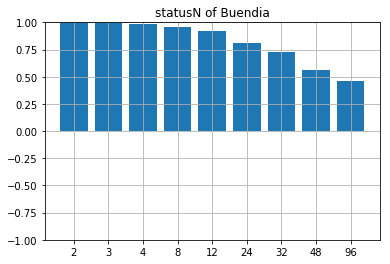

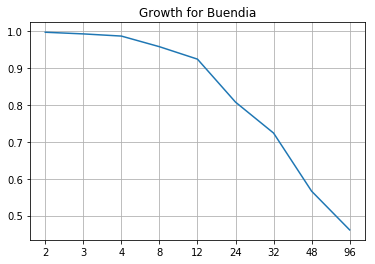

statusN for Road: Edsa Extension
statusN_Rmean=2 : 0.9980281673294896 : 3
statusN_Rmean=3 : 0.9934582336756772 : 9
statusN_Rmean=4 : 0.9890873259340388 : 15
statusN_Rmean=8 : 0.9650406873460332 : 21
statusN_Rmean=12 : 0.9366328593071952 : 27
statusN_Rmean=24 : 0.8423494558975542 : 33
statusN_Rmean=32 : 0.7726160913492629 : 39
statusN_Rmean=48 : 0.6277029970291802 : 45
statusN_Rmean=96 : 0.4922759283752607 : 51
Max for Road Edsa Extension:0.9980281673294896


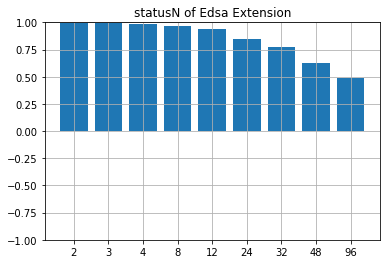

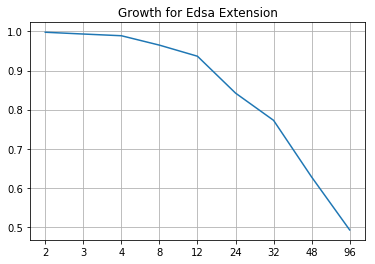

statusN for Road: Finance Road
statusN_Rmean=2 : 0.9907291845362708 : 3
statusN_Rmean=3 : 0.9752340684997324 : 9
statusN_Rmean=4 : 0.9556300217617468 : 15
statusN_Rmean=8 : 0.8647260785479631 : 21
statusN_Rmean=12 : 0.7708859701503236 : 27
statusN_Rmean=24 : 0.6007629117266212 : 33
statusN_Rmean=32 : 0.5626460132810887 : 39
statusN_Rmean=48 : 0.5018944135246558 : 45
statusN_Rmean=96 : 0.4076912531870093 : 51
Max for Road Finance Road:0.9907291845362708


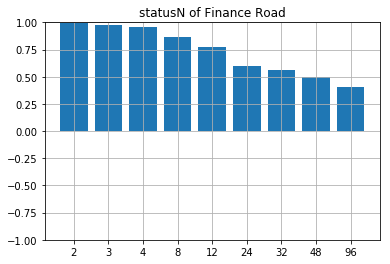

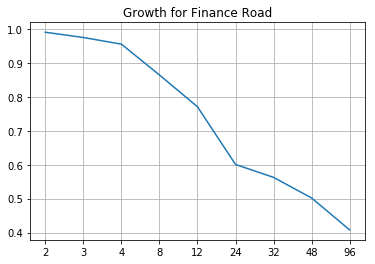

statusN for Road: Gov. Forbes - Lacson
statusN_Rmean=2 : 0.9871336524753392 : 3
statusN_Rmean=3 : 0.9686357665851336 : 9
statusN_Rmean=4 : 0.9430567864460964 : 15
statusN_Rmean=8 : 0.8317373857381382 : 21
statusN_Rmean=12 : 0.7128947644243974 : 27
statusN_Rmean=24 : 0.4941362961683598 : 33
statusN_Rmean=32 : 0.4074484963033354 : 39
statusN_Rmean=48 : 0.2547910307074767 : 45
statusN_Rmean=96 : 0.206257814729916 : 51
Max for Road Gov. Forbes - Lacson:0.9871336524753392


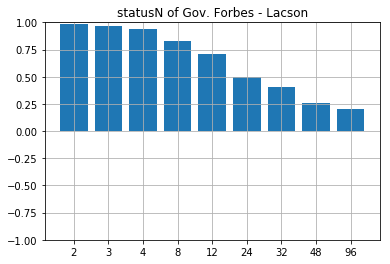

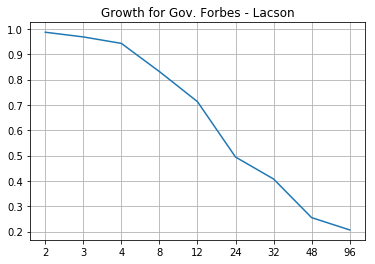

statusN for Road: Lerma
statusN_Rmean=2 : 0.9925942206409546 : 3
statusN_Rmean=3 : 0.9809016387231191 : 9
statusN_Rmean=4 : 0.964760623503752 : 15
statusN_Rmean=8 : 0.8890438019917843 : 21
statusN_Rmean=12 : 0.8028252523415025 : 27
statusN_Rmean=24 : 0.5992612335898213 : 33
statusN_Rmean=32 : 0.5483859125284357 : 39
statusN_Rmean=48 : 0.4364163031935683 : 45
statusN_Rmean=96 : 0.3503139016390246 : 51
Max for Road Lerma:0.9925942206409546


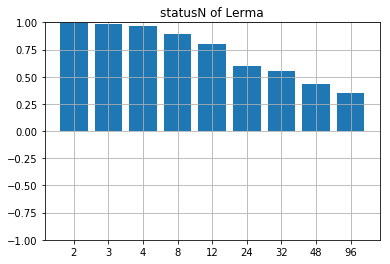

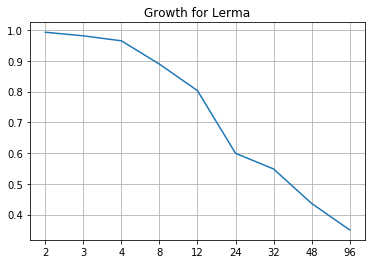

statusN for Road: Magsaysay Ave
statusN_Rmean=2 : 0.9863807111523456 : 3
statusN_Rmean=3 : 0.9652212738068764 : 9
statusN_Rmean=4 : 0.9405757484964784 : 15
statusN_Rmean=8 : 0.83047914565042 : 21
statusN_Rmean=12 : 0.7124584202725145 : 27
statusN_Rmean=24 : 0.4407054367446797 : 33
statusN_Rmean=32 : 0.3745754392001844 : 39
statusN_Rmean=48 : 0.29627157965132994 : 45
statusN_Rmean=96 : 0.1893567280010637 : 51
Max for Road Magsaysay Ave:0.9863807111523456


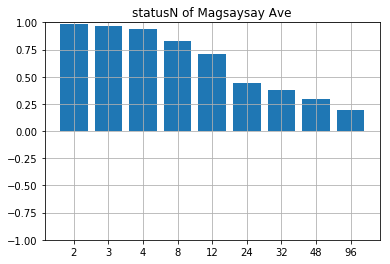

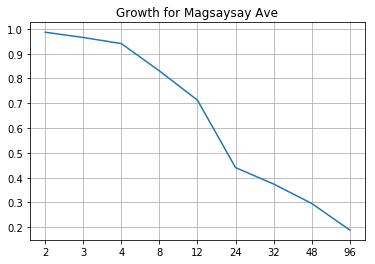

statusN for Road: P.Noval
statusN_Rmean=2 : 0.9921588025767092 : 3
statusN_Rmean=3 : 0.9763452740696156 : 9
statusN_Rmean=4 : 0.9572314856669168 : 15
statusN_Rmean=8 : 0.8621394820763779 : 21
statusN_Rmean=12 : 0.7573090555622531 : 27
statusN_Rmean=24 : 0.5788424276502736 : 33
statusN_Rmean=32 : 0.5431590592548942 : 39
statusN_Rmean=48 : 0.4715842857985603 : 45
statusN_Rmean=96 : 0.3866855453761417 : 51
Max for Road P.Noval:0.9921588025767092


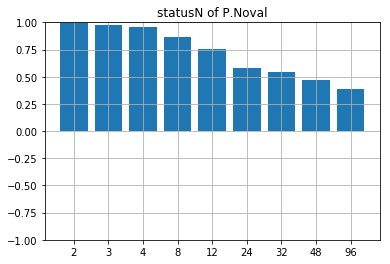

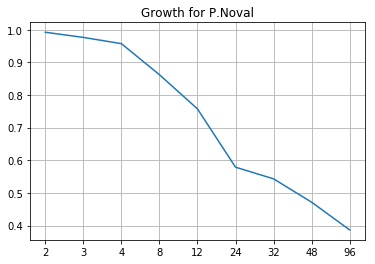

statusN for Road: Pablo Ocampo
statusN_Rmean=2 : 0.9921012461324992 : 3
statusN_Rmean=3 : 0.9751673170299962 : 9
statusN_Rmean=4 : 0.9534899331757456 : 15
statusN_Rmean=8 : 0.8476149578578793 : 21
statusN_Rmean=12 : 0.7496773570376679 : 27
statusN_Rmean=24 : 0.6265965654780726 : 33
statusN_Rmean=32 : 0.574638377948341 : 39
statusN_Rmean=48 : 0.4551453643715033 : 45
statusN_Rmean=96 : 0.32339680601710163 : 51
Max for Road Pablo Ocampo:0.9921012461324992


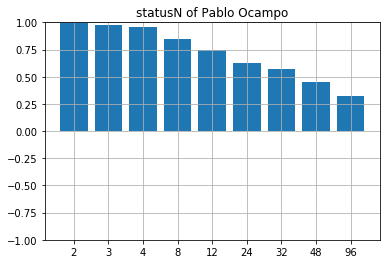

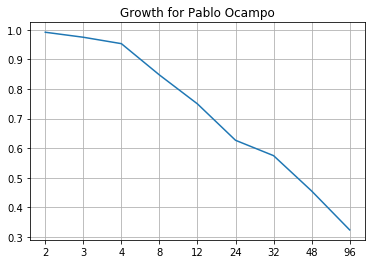

statusN for Road: Pedro Gil
statusN_Rmean=2 : 0.9913677169329536 : 3
statusN_Rmean=3 : 0.9751574544106436 : 9
statusN_Rmean=4 : 0.9556704890817302 : 15
statusN_Rmean=8 : 0.8609605115569636 : 21
statusN_Rmean=12 : 0.7601888437283271 : 27
statusN_Rmean=24 : 0.6019142635223711 : 33
statusN_Rmean=32 : 0.560354197272029 : 39
statusN_Rmean=48 : 0.4803652772691262 : 45
statusN_Rmean=96 : 0.4219177345683041 : 51
Max for Road Pedro Gil:0.9913677169329536


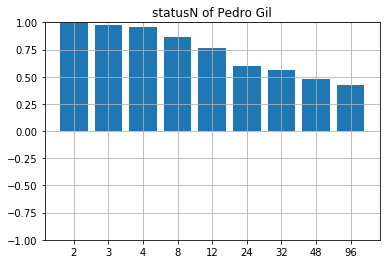

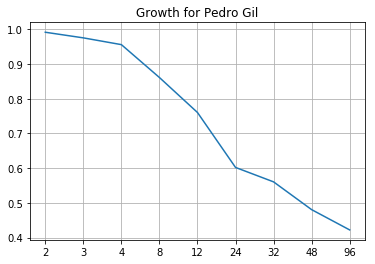

statusN for Road: Quezon Ave.
statusN_Rmean=2 : 0.9760579400388704 : 3
statusN_Rmean=3 : 0.9417884597989046 : 9
statusN_Rmean=4 : 0.8999298525146483 : 15
statusN_Rmean=8 : 0.7166940858580284 : 21
statusN_Rmean=12 : 0.5818432160833337 : 27
statusN_Rmean=24 : 0.4569621323296394 : 33
statusN_Rmean=32 : 0.39035335147849737 : 39
statusN_Rmean=48 : 0.2931178477471909 : 45
statusN_Rmean=96 : 0.20407714299191992 : 51
Max for Road Quezon Ave.:0.9760579400388704


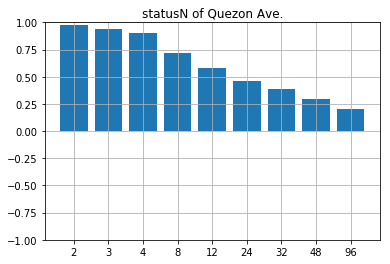

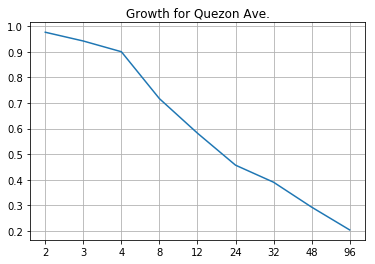

statusN for Road: Quirino
statusN_Rmean=2 : 0.990169170431224 : 3
statusN_Rmean=3 : 0.9712114999752496 : 9
statusN_Rmean=4 : 0.9493818778713012 : 15
statusN_Rmean=8 : 0.8457099037358199 : 21
statusN_Rmean=12 : 0.7732823163386828 : 27
statusN_Rmean=24 : 0.6810483607654995 : 33
statusN_Rmean=32 : 0.6313913703493229 : 39
statusN_Rmean=48 : 0.5231197585075348 : 45
statusN_Rmean=96 : 0.3941487344587772 : 51
Max for Road Quirino:0.990169170431224


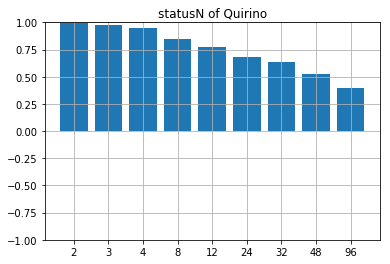

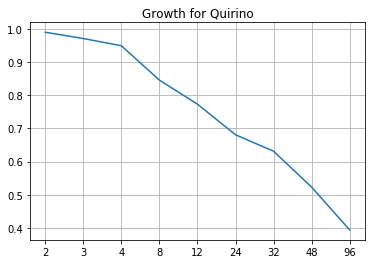

statusN for Road: Rajah Sulayman
statusN_Rmean=2 : 0.9904810569033936 : 3
statusN_Rmean=3 : 0.9728494804577934 : 9
statusN_Rmean=4 : 0.952079043148001 : 15
statusN_Rmean=8 : 0.8542101803352797 : 21
statusN_Rmean=12 : 0.7727234888767979 : 27
statusN_Rmean=24 : 0.6872339148812283 : 33
statusN_Rmean=32 : 0.6544171184893061 : 39
statusN_Rmean=48 : 0.5814478265648513 : 45
statusN_Rmean=96 : 0.4880572413952815 : 51
Max for Road Rajah Sulayman:0.9904810569033936


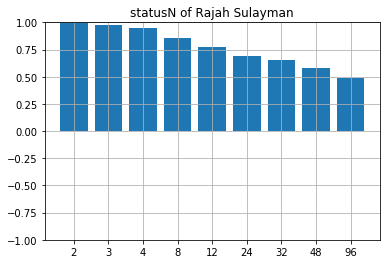

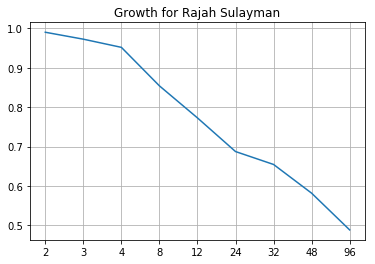

statusN for Road: Taft Ave.
statusN_Rmean=2 : 0.9901782935930836 : 3
statusN_Rmean=3 : 0.9728190628321868 : 9
statusN_Rmean=4 : 0.9525351152575527 : 15
statusN_Rmean=8 : 0.8582459280482209 : 21
statusN_Rmean=12 : 0.7687673041052655 : 27
statusN_Rmean=24 : 0.6736930742552408 : 33
statusN_Rmean=32 : 0.6439645733225488 : 39
statusN_Rmean=48 : 0.5553991752166995 : 45
statusN_Rmean=96 : 0.4723185334154618 : 51
Max for Road Taft Ave.:0.9901782935930836


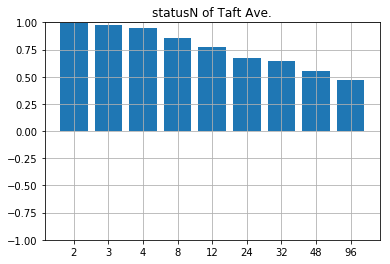

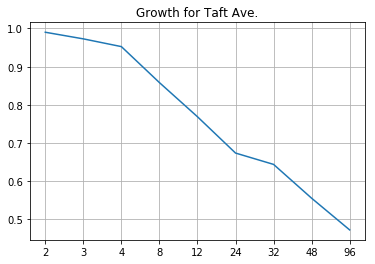

statusN for Road: U.N. Avenue
statusN_Rmean=2 : 0.9958322793567492 : 3
statusN_Rmean=3 : 0.9873824152182448 : 9
statusN_Rmean=4 : 0.9763536786827904 : 15
statusN_Rmean=8 : 0.9182096860683991 : 21
statusN_Rmean=12 : 0.8559391527284684 : 27
statusN_Rmean=24 : 0.7409653287978717 : 33
statusN_Rmean=32 : 0.7007019032917323 : 39
statusN_Rmean=48 : 0.6168952933829353 : 45
statusN_Rmean=96 : 0.5271584002249268 : 51
Max for Road U.N. Avenue:0.9958322793567492


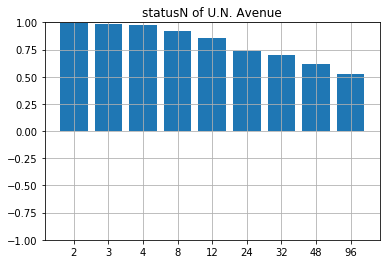

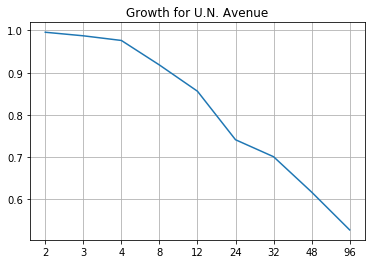

statusN for Road: Vicente Cruz
statusN_Rmean=2 : 0.951238867998664 : 3
statusN_Rmean=3 : 0.8686268521737529 : 9
statusN_Rmean=4 : 0.7830107950286105 : 15
statusN_Rmean=8 : 0.5257356865696508 : 21
statusN_Rmean=12 : 0.34019819896531545 : 27
statusN_Rmean=24 : 0.013081111714718204 : 33
statusN_Rmean=32 : -0.078534233161855 : 39
statusN_Rmean=48 : 0.034084095444953354 : 45
statusN_Rmean=96 : 0.036934013447634015 : 51
Max for Road Vicente Cruz:0.951238867998664


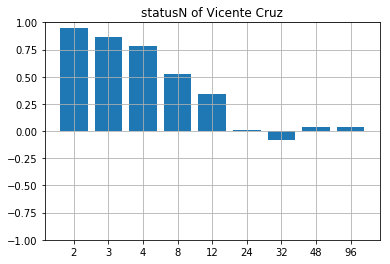

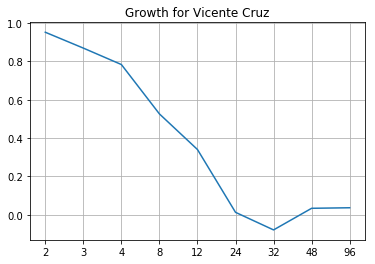

In [32]:
w = 0
r = 0
feature = 'statusN'
y = []

for r in range(len(ROADS_1)):
    y = []
    print(feature + " for Road: " + ROADS_1[r])
    for w in range(len(WINDOWS)):
        for f in range(3, len(ROADS_NB_CR[r].columns)): 
            if f not in rMean[w]:
                continue
            elif feature not in ROADS_NB_CR[r].columns[f]:
                continue
            print(str(ROADS_NB_CR[r].columns[f]) + " : " + str(ROADS_NB_CR[r].iloc[0, f]) + " : " + str(f))
            y.append(ROADS_NB_CR[r].iloc[0, f])
            
    print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
    plt.bar(np.arange(len(WINDOWS)), y)
    plt.ylim(ymax=1, ymin=-1)
    plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
    plt.grid()
    plt.title(feature + " of " + ROADS_1[r])
    plt.show()
    
    plt.plot(y)
    plt.grid()
    plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
    plt.title("Growth for " + ROADS_1[r])

    plt.show()

tempC for Road: Vicente Cruz
tempC_Rmean=2 : -0.3609054534690907 : 69
tempC_Rmean=3 : -0.3673572664871053 : 105
tempC_Rmean=4 : -0.3636821500531492 : 141
tempC_Rmean=8 : -0.3207656116492686 : 177
tempC_Rmean=12 : -0.2364878136693657 : 213
tempC_Rmean=24 : 0.1317464253103483 : 249
tempC_Rmean=32 : 0.31721664132486194 : 285
tempC_Rmean=48 : 0.1770661662564491 : 321
tempC_Rmean=96 : 0.05067786501626074 : 357
Max for Road Vicente Cruz:0.3673572664871053


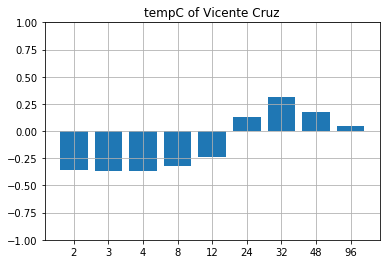

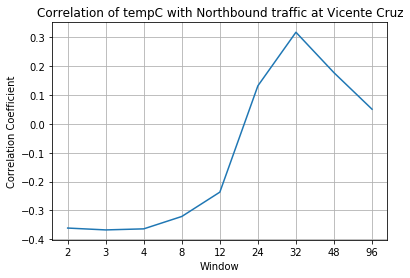

In [33]:
w = 0
r = 0
feature = 'tempC'
y = []

r = 18

print(feature + " for Road: " + ROADS_1[r])
for w in range(len(WINDOWS)):
    for f in range(3, len(ROADS_NB_CR[r].columns)): 
        if f not in rMean[w]:
            continue
        elif feature not in ROADS_NB_CR[r].columns[f]:
            continue
        print(str(ROADS_NB_CR[r].columns[f]) + " : " + str(ROADS_NB_CR[r].iloc[0, f]) + " : " + str(f))
        y.append(ROADS_NB_CR[r].iloc[0, f])

print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
plt.bar(np.arange(len(WINDOWS)), y)
plt.ylim(ymax=1, ymin=-1)
plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
plt.grid()
plt.title(feature + " of " + ROADS_1[r])
plt.show()

plt.plot(y)
plt.grid()
plt.xlabel("Window")
plt.ylabel("Correlation Coefficient")
plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
plt.title("Correlation of " + feature + " with Northbound traffic at " + ROADS_1[r])

plt.show()

tempc = y

dewPointC for Road: Vicente Cruz
dewPointC_Rmean=2 : -0.23310492751118925 : 77
dewPointC_Rmean=3 : -0.23676952226141906 : 113
dewPointC_Rmean=4 : -0.23396952307243365 : 149
dewPointC_Rmean=8 : -0.20281918969848248 : 185
dewPointC_Rmean=12 : -0.139912846404443 : 221
dewPointC_Rmean=24 : 0.11687186889914808 : 257
dewPointC_Rmean=32 : 0.1849812292533183 : 293
dewPointC_Rmean=48 : 0.09484151416322913 : 329
dewPointC_Rmean=96 : 0.013203554252682137 : 365
Max for Road Vicente Cruz:0.23676952226141906


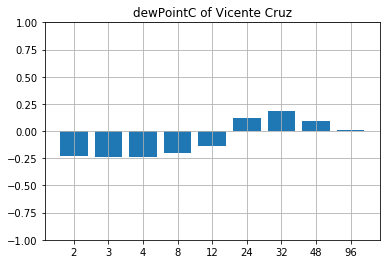

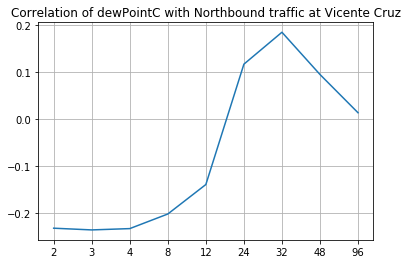

In [75]:
w = 0
r = 0
feature = 'dewPointC'
y = []

r = 18

print(feature + " for Road: " + ROADS_1[r])
for w in range(len(WINDOWS)):
    for f in range(3, len(ROADS_NB_CR[r].columns)): 
        if f not in rMean[w]:
            continue
        elif feature not in ROADS_NB_CR[r].columns[f]:
            continue
        print(str(ROADS_NB_CR[r].columns[f]) + " : " + str(ROADS_NB_CR[r].iloc[0, f]) + " : " + str(f))
        y.append(ROADS_NB_CR[r].iloc[0, f])

print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
plt.bar(np.arange(len(WINDOWS)), y)
plt.ylim(ymax=1, ymin=-1)
plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
plt.grid()
plt.title(feature + " of " + ROADS_1[r])
plt.show()

plt.plot(y)
plt.grid()
plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
plt.title("Correlation of " + feature + " with Northbound traffic at " + ROADS_1[r])

plt.show()

dew = y

windspeedMiles for Road: Vicente Cruz
windspeedMiles_Rmean=2 : -0.12395059253521525 : 70
windspeedMiles_Rmean=3 : -0.11681646559434615 : 106
windspeedMiles_Rmean=4 : -0.10043086039640364 : 142
windspeedMiles_Rmean=8 : -0.06407666527195523 : 178
windspeedMiles_Rmean=12 : 0.0027143554624948925 : 214
windspeedMiles_Rmean=24 : 0.1923941425444446 : 250
windspeedMiles_Rmean=32 : 0.1756117699849107 : 286
windspeedMiles_Rmean=48 : -0.04254498646175295 : 322
windspeedMiles_Rmean=96 : 0.0034229473286316657 : 358
Max for Road Vicente Cruz:0.1923941425444446


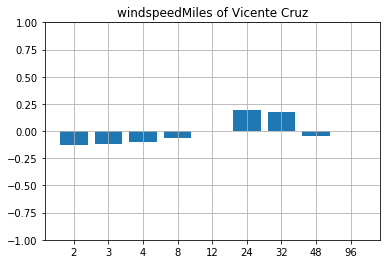

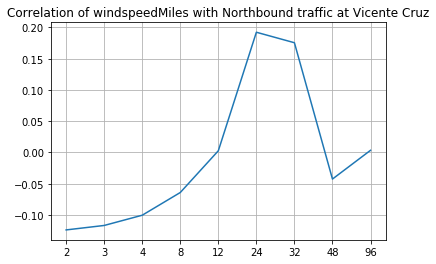

In [76]:
w = 0
r = 0
feature = 'windspeedMiles'
y = []

r = 18

print(feature + " for Road: " + ROADS_1[r])
for w in range(len(WINDOWS)):
    for f in range(3, len(ROADS_NB_CR[r].columns)): 
        if f not in rMean[w]:
            continue
        elif feature not in ROADS_NB_CR[r].columns[f]:
            continue
        print(str(ROADS_NB_CR[r].columns[f]) + " : " + str(ROADS_NB_CR[r].iloc[0, f]) + " : " + str(f))
        y.append(ROADS_NB_CR[r].iloc[0, f])

print("Max for Road " + ROADS_1[r] + ":" + str(np.absolute(y).max()))
plt.bar(np.arange(len(WINDOWS)), y)
plt.ylim(ymax=1, ymin=-1)
plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
plt.grid()
plt.title(feature + " of " + ROADS_1[r])
plt.show()

plt.plot(y)
plt.grid()
plt.xticks(np.arange(len(WINDOWS)), WINDOWS)
plt.title("Correlation of " + feature + " with Northbound traffic at " + ROADS_1[r])

plt.show()

windspd = y

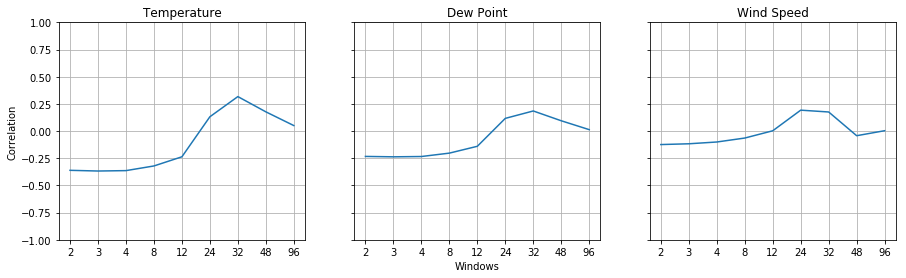

In [145]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')
# row and column sharing
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,4))


ax1.plot(tempc)
ax1.set_xticks(np.arange(len(WINDOWS)))
ax1.set_xticklabels(WINDOWS)
ax1.set_title('Temperature')
ax1.set_ylim([-1, 1])
ax1.set_ylabel("Correlation")
ax1.grid()

ax2.plot(dew)
ax2.set_xticks(np.arange(len(WINDOWS)))
ax2.set_xticklabels(WINDOWS)
ax2.set_ylim([-1, 1])
ax2.set_title('Dew Point')
ax2.grid()
ax2.set_xlabel("Windows")

ax3.plot(windspd)
ax3.set_xticks(np.arange(len(WINDOWS)), WINDOWS)
ax3.set_xticks(np.arange(len(WINDOWS)))
ax3.set_xticklabels(WINDOWS)
ax3.set_ylim([-1, 1])
ax3.set_title('Wind Speed')
ax3.grid()


In [ ]:
#RMSE
woEng = 0.293
wWP = 0.223
wEng = 0.0123

y = [woEng, wWP, wEng]
ylabels = ['A', 'B', 'C']

plt.bar(np.arange(len(y)), y)
# plt.ylim(ymax=1, ymin=-1)
plt.xticks(np.arange(len(ylabels)), ylabels)
# plt.grid()
plt.show()

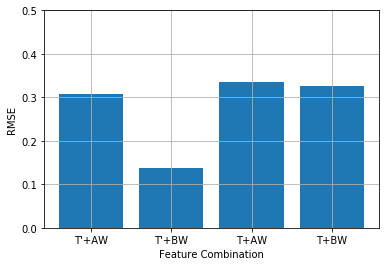

In [159]:
#RMSE
AP = 0.308 
BP = 0.138
A = 0.335
B = 0.326


y = [AP, BP, A, B]
ylabels = ['T\'+AW', 'T\'+BW', 'T+AW', 'T+BW']

plt.grid()
plt.bar(np.arange(len(y)), y)
plt.ylim(ymax=0.5, ymin=0)
plt.xticks(np.arange(len(ylabels)), ylabels)
plt.ylabel("RMSE")
plt.xlabel("Feature Combination")
# plt.grid()
plt.show()

In [161]:
AP = 0.308 
BP = 0.138
A = 0.335
B = 0.326

0.138 - 0.326

-0.188